# Quais Fatores Levam ao Cancelamento? Uma Análise de Churn em Clientes de Telecomunicações

A rotatividade de clientes (churn) é um desafio crítico para empresas de telecomunicações, resultando em perda de receita e altos custos para adquirir novos clientes. Compreender os motivos que levam um cliente a cancelar o serviço é o primeiro passo para criar estratégias de retenção eficazes.

**Objetivo:** Este projeto tem como objetivo construir um **modelo de machine learning** capaz de **prever quais clientes possuem maior probabilidade de churn**. Para isso, realizaremos uma análise exploratória detalhada nos dados para identificar os principais perfis e comportamentos associados ao cancelamento. O resultado final não será apenas um modelo preditivo, mas também insights valiosos que podem auxiliar a empresa a desenvolver ações proativas para aumentar a fidelidade de seus clientes.

O projeto seguirá as seguintes etapas:  
1.  `Preparação do Ambiente e Carga dos Dados`
2.  `Diagnóstico e Preparação dos Dados`
3.  `Análise Exploratória de Dados (EDA)`
4.  `Pré-processamento e Engenharia de Features`
5.  `Criação de um Modelo Preditivo de Machine Learning`
6.  `Conclusão e Próximos Passos`

## 1. Preparação do Ambiente e Carga dos Dados

Para iniciar o projeto, o primeiro passo é preparar o ambiente de trabalho, importando todas as bibliotecas que serão utilizadas ao longo da análise. Centralizar as importações no início do notebook é uma boa prática que organiza o código e facilita a replicação do ambiente.

As principais bibliotecas utilizadas serão:
- **Pandas:** para manipulação, limpeza e análise dos dados em formato de DataFrame.
- **Matplotlib e Seaborn:** para a criação de visualizações de dados, ajudando a extrair insights de forma gráfica.
- **Statistics:** para cálculos estatísticos básicos.
- **IPython.display:** para renderizar elementos ricos, como textos formatados em Markdown, diretamente nas saídas das células.

In [3]:
#Importar as bibliotecas
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statistics as sts
from IPython.display import Markdown, display

Carregando o arquivo `WA_Fn-UseC_-Telco-Customer-Churn.csv` para um DataFrame do pandas e exibindo as 5 primeiras linhas para uma inspeção inicial.

In [4]:
# --- 1. Carregamento dos Dados ---
caminho_arquivo = '../data/raw/WA_Fn-UseC_-Telco-Customer-Churn.csv'
dados = pd.read_csv(caminho_arquivo)

# Apenas para confirmar que carregou, podemos dar um .head() simples aqui
dados.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


## 2. Diagnóstico e Preparação dos Dados

Com os dados carregados na etapa anterior, iniciamos agora a fase de diagnóstico e preparação. O objetivo é entender a "saúde" do nosso conjunto de dados e realizar os ajustes necessários para garantir sua qualidade e consistência antes da análise exploratória.

Esta etapa será dividida nos seguintes passos:
* **Diagnóstico Rápido:** Faremos uma primeira investigação sobre a estrutura, tipos de dados, valores ausentes e estatísticas básicas do dataset.
* **Dicionário de Dados:** Documentaremos o significado de cada coluna para facilitar a análise.
* **Limpeza e Formatação:** Com base no diagnóstico, corrigiremos problemas como tipos de dados inadequados e trataremos quaisquer valores nulos encontrados.

In [5]:
# --- 2. Diagnóstico Rápido e Inspeção Inicial ---

# Exibindo as 5 primeiras linhas para uma visão geral
print("--- Amostra dos Dados (Primeiras 5 Linhas) ---")
display(dados.head())

# Exibindo as 5 últimas linhas para verificar o final do arquivo
print("\n--- Amostra dos Dados (Últimas 5 Linhas) ---")
display(dados.tail())

# Verificando as dimensões do DataFrame (linhas, colunas)
print("\n--- Dimensões do DataFrame (Linhas, Colunas) ---")
print(dados.shape)

# Obtendo um resumo técnico completo (tipos de dados, contagem de nulos, uso de memória)
# Este é o comando mais importante desta etapa.
print("\n--- Resumo Técnico do DataFrame ---")
dados.info()

# Obtendo um resumo estatístico das colunas numéricas
print("\n--- Resumo Estatístico (Colunas Numéricas) ---")
display(dados.describe())


--- Amostra dos Dados (Primeiras 5 Linhas) ---


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes



--- Amostra dos Dados (Últimas 5 Linhas) ---


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes
7042,3186-AJIEK,Male,0,No,No,66,Yes,No,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),105.65,6844.5,No



--- Dimensões do DataFrame (Linhas, Colunas) ---
(7043, 21)

--- Resumo Técnico do DataFrame ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   obje

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


### 2.1. Dicionário de Dados

Para facilitar a compreensão das variáveis presentes em nosso conjunto de dados, esta seção servirá como um dicionário, descrevendo o significado de cada coluna.

---
**Informações Demográficas dos Clientes:**

* **`gender`**: Gênero do cliente (Female, Male).
* **`SeniorCitizen`**: Informa se o cliente é idoso ou não (Originalmente 0 ou 1, depois convertido para 'No' e 'Yes').
* **`Partner`**: Se o cliente possui um parceiro ou parceira (Yes, No).
* **`Dependents`**: Se o cliente possui dependentes financeiros (Yes, No).

**Informações da Conta do Cliente:**

* **`customerID`**: ID único para identificação de cada cliente.
* **`tenure`**: Número de meses que o cliente permaneceu na empresa.
* **`Contract`**: Tipo de contrato do cliente (Month-to-month, One year, Two year).
* **`PaperlessBilling`**: Se o cliente recebe a fatura online (Yes, No).
* **`PaymentMethod`**: O método de pagamento do cliente (ex: Electronic check, Mailed check, etc.).
* **`MonthlyCharges`**: O valor cobrado do cliente mensalmente.
* **`TotalCharges`**: O valor total cobrado do cliente desde o início do contrato.

**Informações dos Serviços Contratados:**

* **`PhoneService`**: Se o cliente possui serviço de telefonia (Yes, No).
* **`MultipleLines`**: Se o cliente possui múltiplas linhas telefônicas (Yes, No, No phone service).
* **`InternetService`**: O tipo de serviço de internet do cliente (DSL, Fiber optic, No).
* **`OnlineSecurity`**: Se o cliente possui o serviço de segurança online (Yes, No, No internet service).
* **`OnlineBackup`**: Se o cliente possui o serviço de backup online (Yes, No, No internet service).
* **`DeviceProtection`**: Se o cliente possui seguro para seus aparelhos (Yes, No, No internet service).
* **`TechSupport`**: Se o cliente possui suporte técnico especializado (Yes, No, No internet service).
* **`StreamingTV`**: Se o cliente possui o serviço de streaming de TV (Yes, No, No internet service).
* **`StreamingMovies`**: Se o cliente possui o serviço de streaming de filmes (Yes, No, No internet service).

**Variável Alvo (Target):**

* **`Churn`**: A variável que queremos prever. Indica se o cliente cancelou o serviço (Yes) ou não (No).

### 2.1. Correção e Padronização de Tipos de Dados

Nesta etapa, focamos em ajustar as colunas cujos tipos de dados não representavam corretamente a natureza da informação. Um dataset limpo e consistente é fundamental para qualquer análise ou modelo de machine learning.

#### Coluna `TotalCharges`: de `object` para numérico

A análise com `.info()` revelou que a coluna `TotalCharges` estava formatada como `object` (texto), quando na verdade deveria ser um tipo numérico para representar os valores de cobrança.

Para resolver isso, convertemos a coluna usando `pd.to_numeric`. O uso do parâmetro `errors='coerce'` é essencial aqui, pois ele garante que qualquer entrada que não seja um número válido (como um espaço em branco, que indica ausência de cobrança para novos clientes) seja transformada em `NaN` (Not a Number). Isso nos permite identificar e tratar esses casos específicos posteriormente, sem interromper o processo.

#### Coluna `SeniorCitizen`: de `int` para `object` (categórico)

Observando os dados, notamos que a coluna `SeniorCitizen` usava os valores `0` e `1`. Embora seja um formato numérico (`int64`), semanticamente, ela é uma variável categórica, representando "Não" e "Sim".

Para tornar o dataset mais intuitivo e consistente com outras colunas binárias (como `Partner` e `Dependents`), decidimos mapear `0` para `'No'` e `1` para `'Yes'`. Essa transformação altera o tipo da coluna para `object` e melhora significativamente a legibilidade dos dados.

In [6]:
# --- Ajuste 1: Convertendo a coluna 'SeniorCitizen' de int para object ---

# Mapeando os valores 0 e 1 para 'No' e 'Yes'
mapeamento_senior = {0: 'No', 1: 'Yes'}
dados['SeniorCitizen'] = dados['SeniorCitizen'].map(mapeamento_senior)


# --- Ajuste 2: Convertendo a coluna 'TotalCharges' de object para numérico ---

# Usando pd.to_numeric com 'coerce' para lidar com erros
dados['TotalCharges'] = pd.to_numeric(dados['TotalCharges'], errors='coerce')


# --- Verificação Final ---

# Verificando a contagem de valores nulos que surgiram em 'TotalCharges'
print("Contagem de valores nulos por coluna:")
print(dados.isnull().sum())
print("-" * 40)

# Verificando os novos tipos de dados das colunas alteradas
print("Verificação dos tipos de dados (Dtypes) atualizados:")
dados[['SeniorCitizen', 'TotalCharges']].info()

Contagem de valores nulos por coluna:
customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64
----------------------------------------
Verificação dos tipos de dados (Dtypes) atualizados:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SeniorCitizen  7043 non-null   object 
 1   TotalCharges   7032 non-null   float64
dtypes: float64(1), object(1)
memory usage: 110.2+ KB


### 2.2. Investigando a Origem dos Dados Ausentes

Como resultado da conversão, a coluna `TotalCharges` agora possui 11 valores nulos (`NaN`). Antes de tomar qualquer decisão, como simplesmente remover essas linhas, preciso investigar a causa raiz desse problema.

Minha principal hipótese é que esses valores nulos correspondam a clientes novos, que possuem `tenure` (tempo de contrato) igual a 0 e, por isso, ainda não geraram uma cobrança total. Para validar essa suposição, vou filtrar o DataFrame e analisar especificamente essas 11 linhas para confirmar se essa relação é verdadeira.

In [7]:
# Filtrando o DataFrame para exibir apenas as linhas onde 'TotalCharges' é nulo
# e confirmando nossa hipótese ao olhar a coluna 'tenure'
clientes_novos = dados[dados['TotalCharges'].isnull()]

print("Clientes com valores ausentes em 'TotalCharges':")
print(clientes_novos[['tenure', 'MonthlyCharges', 'TotalCharges']])

Clientes com valores ausentes em 'TotalCharges':
      tenure  MonthlyCharges  TotalCharges
488        0           52.55           NaN
753        0           20.25           NaN
936        0           80.85           NaN
1082       0           25.75           NaN
1340       0           56.05           NaN
3331       0           19.85           NaN
3826       0           25.35           NaN
4380       0           20.00           NaN
5218       0           19.70           NaN
6670       0           73.35           NaN
6754       0           61.90           NaN


A análise que realizei na etapa anterior confirma minha hipótese: os 11 clientes com `TotalCharges` nulo são, de fato, clientes novos com `tenure` igual a 0.

Com essa confirmação, tenho a segurança para justificar minha decisão de **remover essas linhas**, em vez de tentar preenchê-las com algum valor. Minha decisão se baseia em dois pontos principais:

1.  **Manter a Integridade dos Dados:** Pela lógica do negócio, não faria sentido eu imputar um valor de cobrança (como a média, por exemplo) para um cliente que ainda não completou o primeiro mês. Fazer isso criaria um dado artificial e inconsistente que poderia prejudicar a análise.
2.  **Impacto Estatístico Mínimo:** Estou lidando com apenas 11 linhas em um universo de mais de 7.000. A exclusão de uma amostra tão pequena não irá distorcer as distribuições gerais dos dados nem enfraquecer o desempenho do futuro modelo de machine learning.

Com isso justificado, o próximo passo é aplicar a remoção para finalizar a etapa de limpeza.

### 2.3. Aplicando a Limpeza e Finalizando a Preparação

Com minha decisão sobre os dados nulos devidamente justificada, agora vou executar a limpeza final no meu DataFrame.

Utilizarei o método `.dropna()` para remover as 11 linhas problemáticas. Logo em seguida, farei uma checagem completa com `.isnull().sum()` e `.info()` para certificar que o conjunto de dados está agora íntegro, sem valores ausentes e com os tipos de dados corretos, pronto para a próxima fase do projeto: a Análise Exploratória.

In [8]:
# Removendo as linhas que contêm qualquer valor nulo no DataFrame
# O argumento inplace=True modifica o DataFrame 'dados' diretamente
dados.dropna(inplace=True)

# Verificação final para garantir que não há mais valores nulos
print("Verificação de valores nulos após a remoção:")
print(dados.isnull().sum())

print("\n-------------------------------------------------\n")

# Exibindo as informações do DataFrame para confirmar a nova contagem de entradas
print("Informações finais do DataFrame após a limpeza:")
dados.info()

Verificação de valores nulos após a remoção:
customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

-------------------------------------------------

Informações finais do DataFrame após a limpeza:
<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   gender            7032 non-null   object 
 2   SeniorCitizen     7032 non-null   object 
 3   Partner           7032 non-null   obje

---
## 3. Análise Exploratória de Dados (EDA)

Com os dados limpos e preparados, iniciamos a fase de Análise Exploratória. O objetivo aqui é investigar os dados visualmente para descobrir padrões, identificar anomalias, testar hipóteses e extrair os primeiros insights que guiarão a construção do nosso modelo.

Começaremos com a **Análise Univariada**, onde cada variável é analisada individualmente.

### 3.1. Análise Univariada - Variáveis Numéricas

Vamos começar analisando a distribuição das nossas variáveis numéricas (`tenure`, `MonthlyCharges` e `TotalCharges`). Para isso, utilizaremos:
* **Histogramas:** Para entender a forma da distribuição e a frequência dos valores.
* **Boxplots:** Para identificar a mediana, os quartis, a dispersão e possíveis outliers.

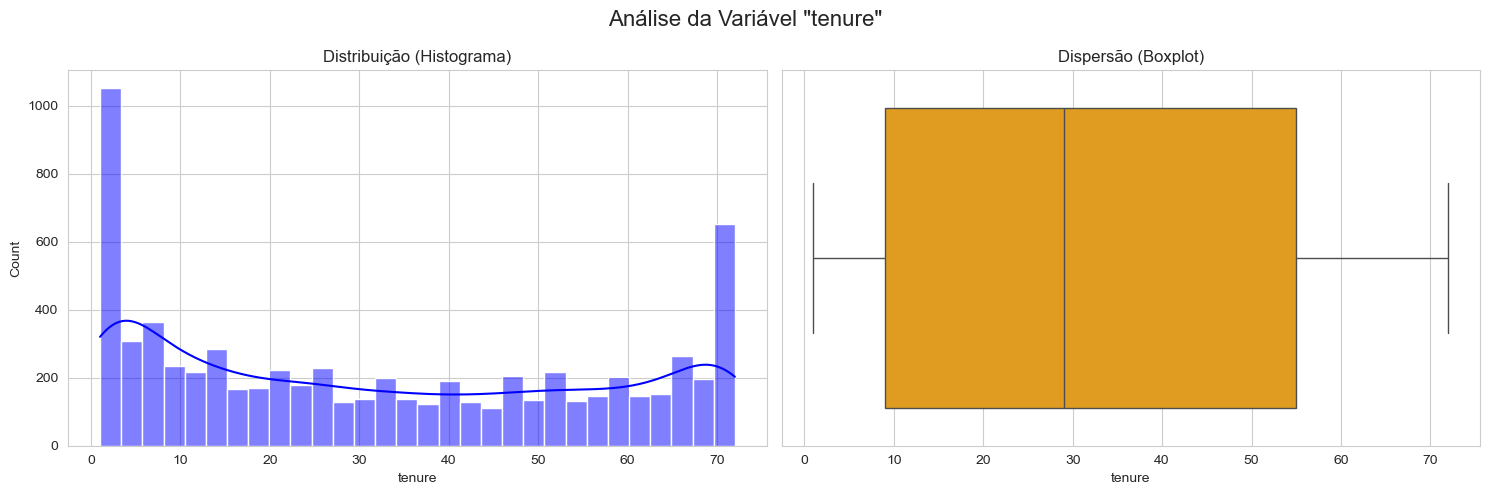


### Variável `tenure` (Tempo de Contrato)

- **Histograma**:  
  - Muitos clientes estão nos primeiros 0–10 meses.  
  - Também existe um grupo de clientes antigos (60–70 meses).  
  - Mostra que a base é formada por muita gente nova e poucos clientes bem fiéis.

- **Boxplot**:  
  - Mediana em ~30 meses (metade tem menos de 2 anos e meio de contrato).  
  - Grande parte fica entre ~10 e ~55 meses.  
  - Não aparecem outliers.

- **O que isso pode indicar sobre Churn**:  
  - Clientes novos têm mais chance de sair cedo.  
  - Clientes antigos tendem a ser mais estáveis.

- **Próximos passos**:  
  - Comparar `tenure` com `Churn` para ver se clientes mais recentes realmente cancelam mais.  
  - Pensar em estratégias para reter clientes logo nos primeiros meses.



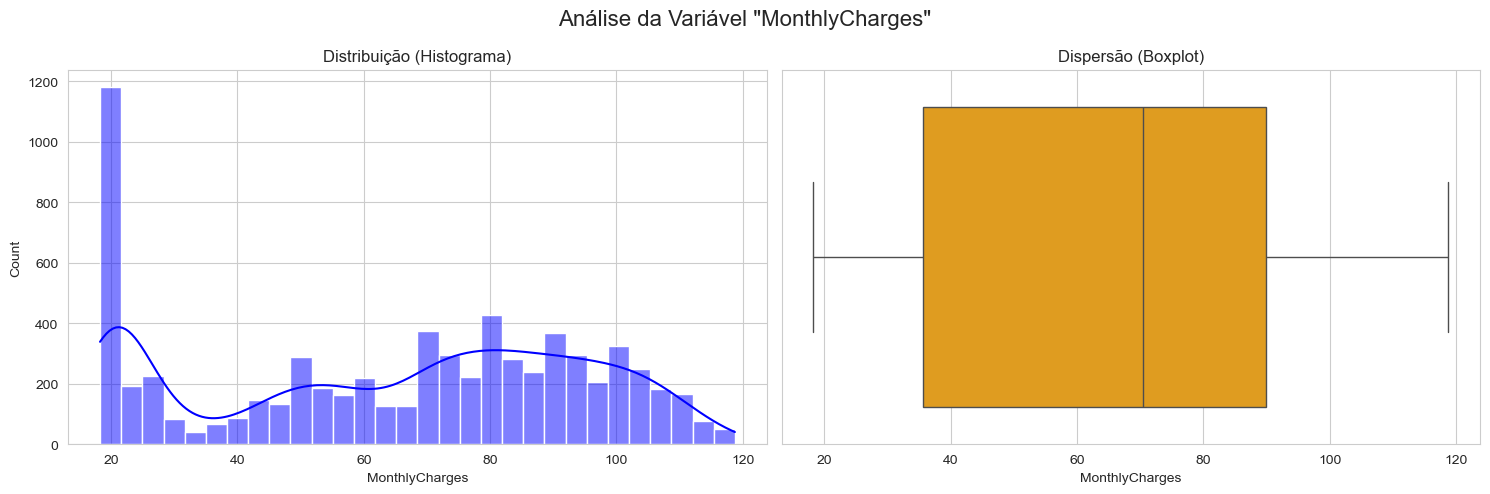


### Variável `MonthlyCharges` (Gastos Mensais)

- **Histograma**:  
  - Os valores não são distribuídos de forma uniforme, mas sim em “faixas”.  
  - Há um grupo grande pagando em torno de 20 (planos básicos) e outro em torno de 70–80 (planos mais caros).  
  - Depois de 80 os clientes vão diminuindo.

- **Boxplot**:  
  - Mediana perto de 70.  
  - Metade dos clientes paga entre ~35 e ~90.  
  - Não aparecem outliers, mas existe uma cauda de valores mais altos.

- **O que isso pode indicar sobre Churn**:  
  - Quem paga mais caro pode estar mais propenso a cancelar (custo alto).  
  - Clientes de planos baratos tendem a ser mais estáveis.

- **Próximos passos**:  
  - Comparar `MonthlyCharges` com `Churn`.  
  - Ver se os picos nos valores estão ligados a tipos de plano específicos (ex.: fibra vs DSL).



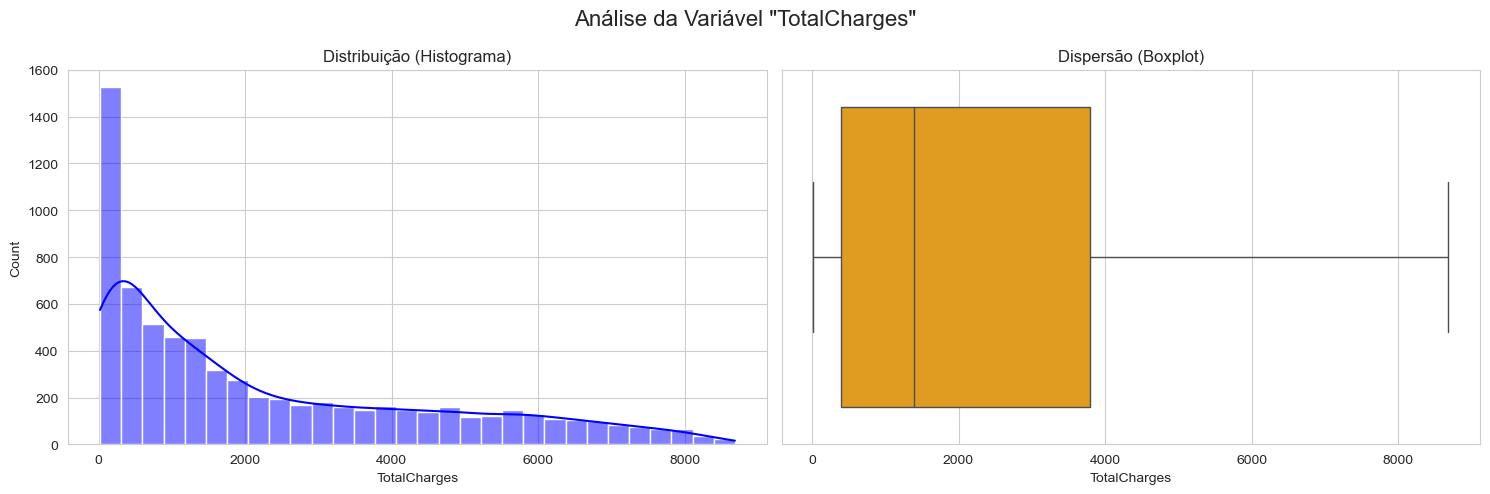


### Variável `TotalCharges` (Gastos Totais)

- **Histograma**:  
  - A maioria dos clientes gastou pouco (até 2000).  
  - Existe um grande pico entre 0 e 500, o que faz sentido para clientes novos.  
  - Poucos chegam a valores altos (até 8000).

- **Boxplot**:  
  - Mediana em torno de 1500–1800.  
  - Metade dos clientes gasta entre ~400 e ~4000.  
  - Não aparecem outliers, mas a distribuição é puxada para valores baixos.

- **O que isso pode indicar sobre Churn**:  
  - Clientes com gasto total baixo provavelmente são novos e saem cedo.  
  - Clientes que ficam mais tempo acumulam valores maiores, mas são minoria.

- **Próximos passos**:  
  - Comparar `TotalCharges` com `tenure` e `Churn` (ex.: scatterplot).  
  - Verificar se valores iguais a 0 são casos reais ou possíveis erros no dado.



In [67]:

# Estilo visual com grade clara ao fundo
sns.set_style('whitegrid')

# Seleciona automaticamente todas as colunas com tipos numéricos (int64 e float64)
# O .columns no final garante que estamos pegando apenas a lista de nomes das colunas para o loop
colunas_numericas = dados.select_dtypes(include=['int64', 'float64']).columns

# Dicionário com insights pré-definidos para cada coluna
insights = {
    'tenure': """
### Variável `tenure` (Tempo de Contrato)

- **Histograma**:  
  - Muitos clientes estão nos primeiros 0–10 meses.  
  - Também existe um grupo de clientes antigos (60–70 meses).  
  - Mostra que a base é formada por muita gente nova e poucos clientes bem fiéis.

- **Boxplot**:  
  - Mediana em ~30 meses (metade tem menos de 2 anos e meio de contrato).  
  - Grande parte fica entre ~10 e ~55 meses.  
  - Não aparecem outliers.

- **O que isso pode indicar sobre Churn**:  
  - Clientes novos têm mais chance de sair cedo.  
  - Clientes antigos tendem a ser mais estáveis.

- **Próximos passos**:  
  - Comparar `tenure` com `Churn` para ver se clientes mais recentes realmente cancelam mais.  
  - Pensar em estratégias para reter clientes logo nos primeiros meses.

""",

    'MonthlyCharges': """
### Variável `MonthlyCharges` (Gastos Mensais)

- **Histograma**:  
  - Os valores não são distribuídos de forma uniforme, mas sim em “faixas”.  
  - Há um grupo grande pagando em torno de 20 (planos básicos) e outro em torno de 70–80 (planos mais caros).  
  - Depois de 80 os clientes vão diminuindo.

- **Boxplot**:  
  - Mediana perto de 70.  
  - Metade dos clientes paga entre ~35 e ~90.  
  - Não aparecem outliers, mas existe uma cauda de valores mais altos.

- **O que isso pode indicar sobre Churn**:  
  - Quem paga mais caro pode estar mais propenso a cancelar (custo alto).  
  - Clientes de planos baratos tendem a ser mais estáveis.

- **Próximos passos**:  
  - Comparar `MonthlyCharges` com `Churn`.  
  - Ver se os picos nos valores estão ligados a tipos de plano específicos (ex.: fibra vs DSL).

""",

    'TotalCharges': """
### Variável `TotalCharges` (Gastos Totais)

- **Histograma**:  
  - A maioria dos clientes gastou pouco (até 2000).  
  - Existe um grande pico entre 0 e 500, o que faz sentido para clientes novos.  
  - Poucos chegam a valores altos (até 8000).

- **Boxplot**:  
  - Mediana em torno de 1500–1800.  
  - Metade dos clientes gasta entre ~400 e ~4000.  
  - Não aparecem outliers, mas a distribuição é puxada para valores baixos.

- **O que isso pode indicar sobre Churn**:  
  - Clientes com gasto total baixo provavelmente são novos e saem cedo.  
  - Clientes que ficam mais tempo acumulam valores maiores, mas são minoria.

- **Próximos passos**:  
  - Comparar `TotalCharges` com `tenure` e `Churn` (ex.: scatterplot).  
  - Verificar se valores iguais a 0 são casos reais ou possíveis erros no dado.

"""
}

# Loop para gerar gráficos e exibir insights
for coluna in colunas_numericas:
    fig, axes = plt.subplots(1, 2, figsize=(15, 5))
    fig.suptitle(f'Análise da Variável "{coluna}"', fontsize=16)

    # Histograma (distribuição) com curva de densidade
    sns.histplot(data=dados, x=coluna, kde=True, ax=axes[0], color='blue', bins=30)
    axes[0].set_title('Distribuição (Histograma)')

    # Boxplot (dispersão, mediana, quartis, outliers)
    sns.boxplot(data=dados, x=coluna, ax=axes[1], color='orange')
    axes[1].set_title('Dispersão (Boxplot)')

    plt.tight_layout()
    plt.show()

    # Exibe o Markdown correspondente à coluna
    display(Markdown(insights[coluna]))
    print( "\n " + '='*80)

### 3.2. Análise Univariada - Variáveis Categóricas

Agora, vamos analisar as variáveis categóricas para entender a frequência e a distribuição de suas categorias. Utilizaremos **gráficos de barras (countplots)** para visualizar a contagem de clientes em cada categoria, o que nos ajudará a identificar perfis predominantes na base de clientes.

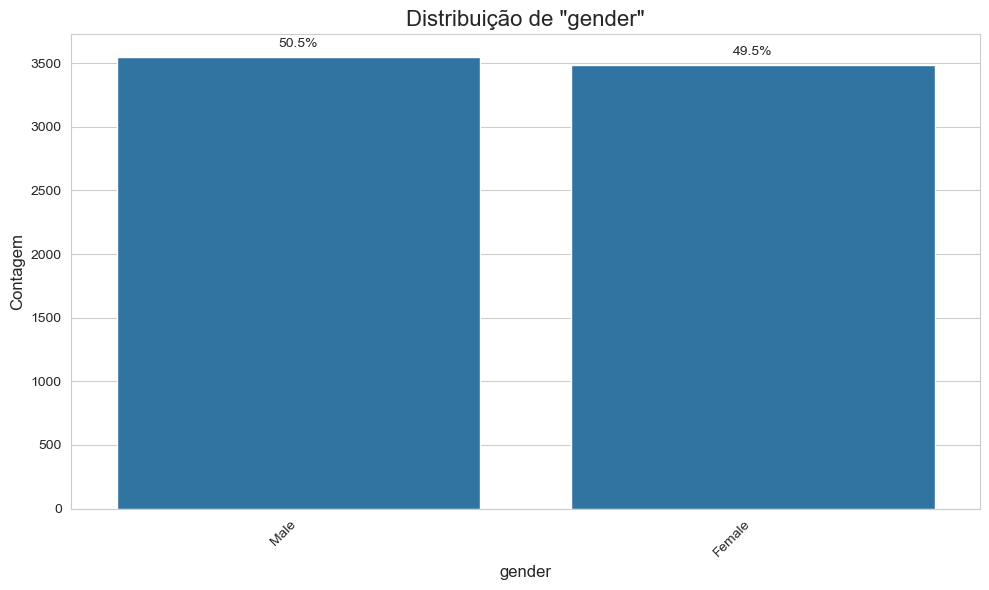


### Variável `gender` — Gênero do cliente (`Male`, `Female`).
- **Distribuição**: A distribuição de gênero está bastante equilibrada, com **50,5% de clientes do sexo masculino** e **49,5% do sexo feminino**.
- **Insight**: Esse equilíbrio indica que **não há viés de gênero relevante** na base de clientes, o que é positivo para análises comparativas e modelagem preditiva, pois reduz o risco de distorções. Ainda assim, é interessante verificar se existem **diferenças sutis no comportamento de churn ou nas preferências de serviços** entre os gêneros.
- **Próximos Passos**: Analisar a taxa de churn por `gender` para identificar possíveis diferenças. Cruzar com outras variáveis como `tenure` (tempo de contrato) e `InternetService` para detectar interações relevantes entre gênero e comportamento de uso ou cancelamento.


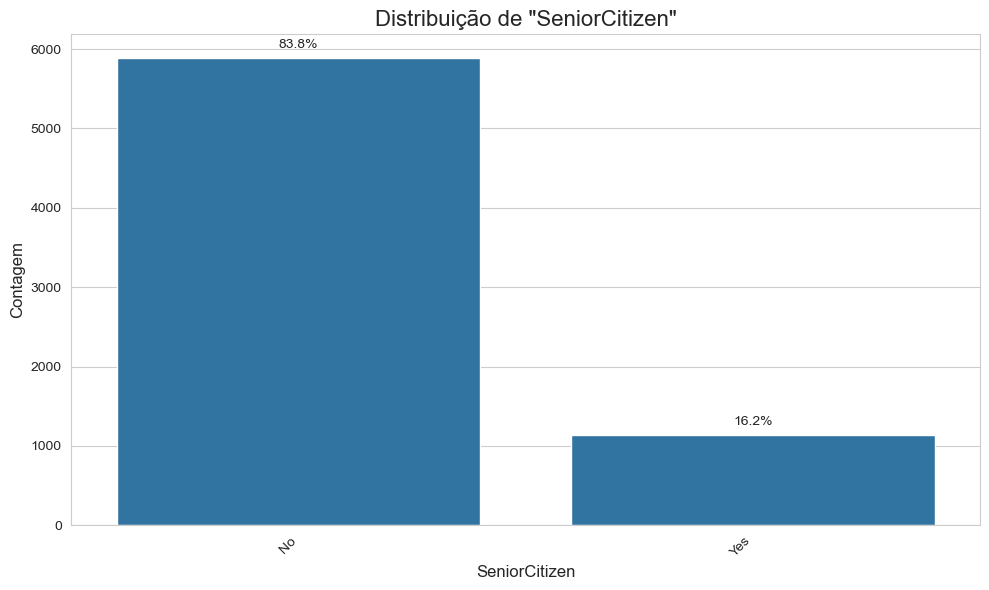


### Variável `SeniorCitizen` — Indica se o cliente é idoso (`Yes`) ou não (`No`).
- **Distribuição**: A maioria dos clientes **não é idosa** — **83,8% estão marcados como `No`**, enquanto apenas **16,2% são identificados como idosos (`Yes`)**.
- **Insight**: A distribuição mostra um claro desbalanceamento, indicando que o serviço é mais utilizado por clientes mais jovens ou de meia-idade. Esse fator pode influenciar na taxa de churn se houver diferenças de comportamento entre esses dois públicos.
- **Próximos Passos**: Analisar a taxa de churn por `SeniorCitizen` para verificar se os clientes idosos (`Yes`) apresentam maior tendência ao cancelamento, possivelmente por razões como custo, complexidade no uso ou menor aderência ao serviço digital.


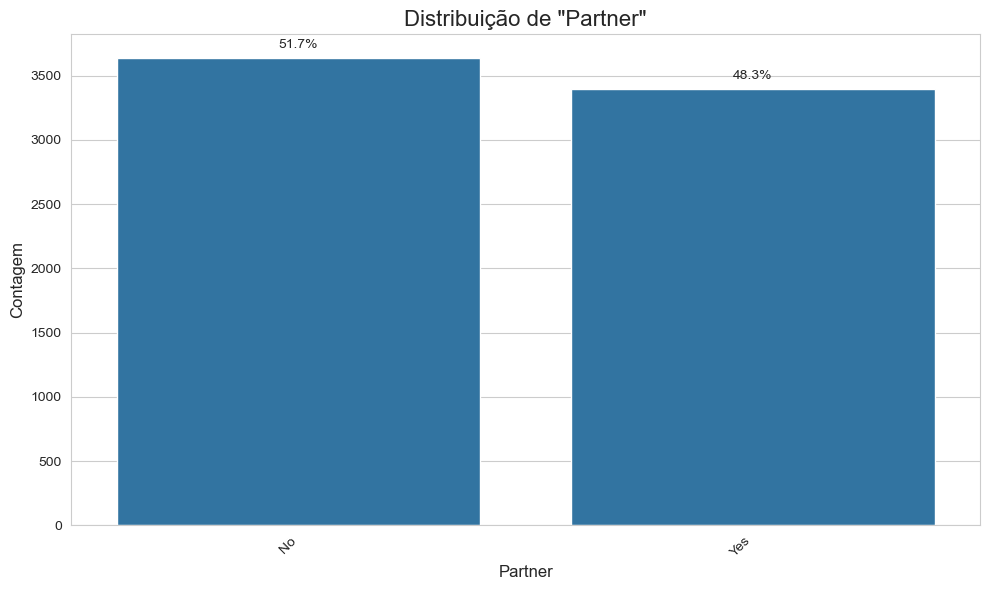


### Variável `Partner` — Indica se o cliente possui parceiro ou parceira (`Yes` ou `No`)
- **Distribuição**: A distribuição está relativamente equilibrada: **51,7% dos clientes não possuem parceiro(a)** (`No`) e **48,3% possuem** (`Yes`).
- **Insight**: Esse equilíbrio indica que a variável `Partner` **não apresenta viés amostral significativo**, o que é positivo para análises comparativas. Isso permite avaliar de forma mais justa se a presença de um parceiro influencia no comportamento do cliente.
- **Próximos Passos**: Analisar a taxa de churn por `Partner` para verificar se a presença de parceiro(a) está associada a maior retenção ou maior propensão ao cancelamento.


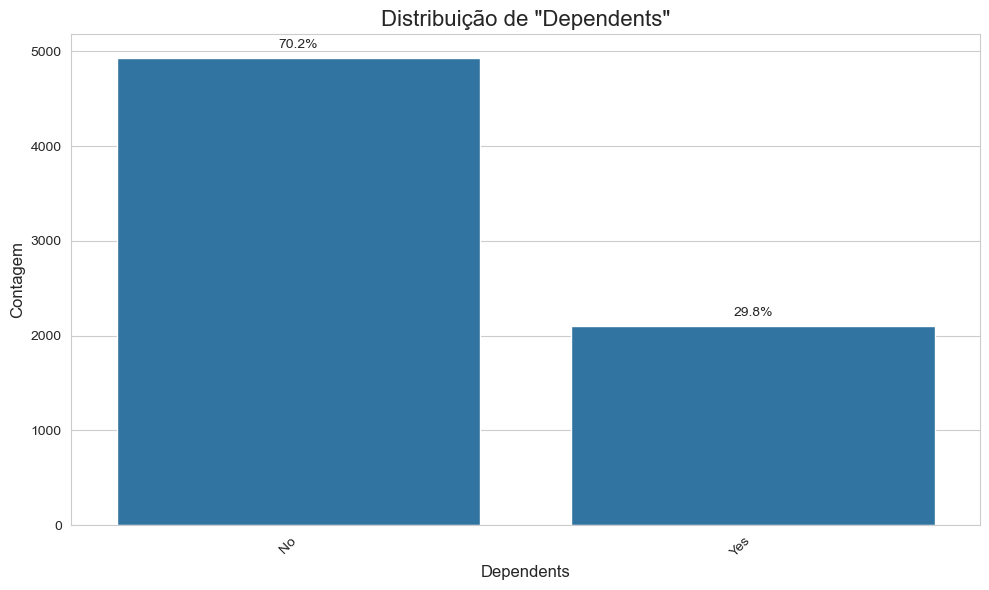


### Variável `Dependents` — Indica se o cliente possui dependentes (`Yes` ou `No`)
- **Distribuição**: A maioria dos clientes **não possui dependentes** — **70,2% responderam `No`**, enquanto **29,8% possuem (`Yes`)**.
- **Insight**: Há um desequilíbrio relevante, indicando que o serviço é mais utilizado por clientes sem dependentes. Isso pode refletir uma **falta de adequação dos serviços às necessidades de clientes com filhos ou familiares sob cuidado**, o que pode impactar negativamente a retenção desse público.
- **Próximos Passos**: Analisar a taxa de churn por `Dependents` para verificar se há maior propensão ao cancelamento entre clientes com dependentes. Também pode ser útil cruzar com variáveis como `Partner` e `Contract` para investigar perfis familiares mais amplos.


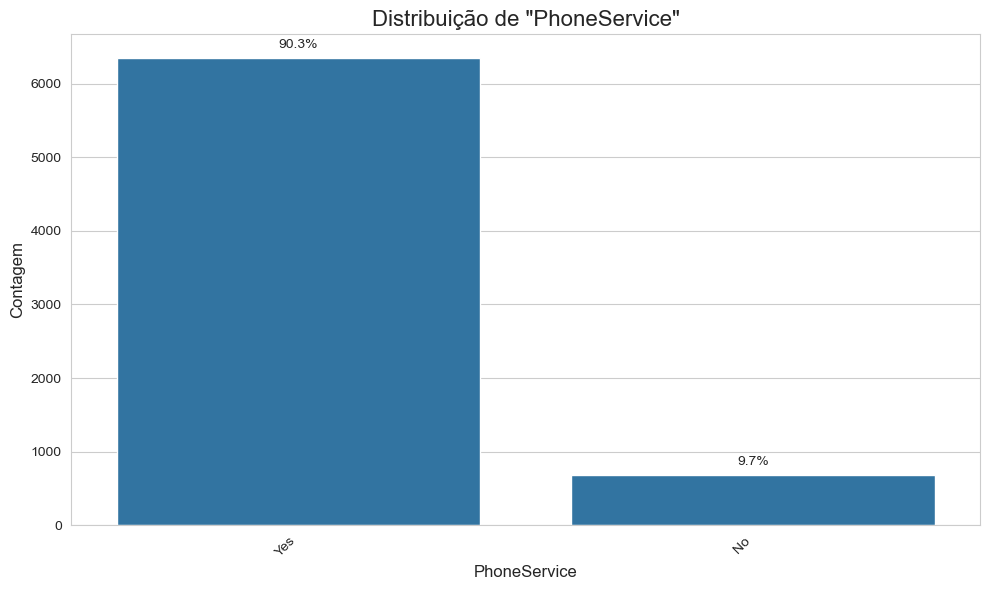


### Variável `PhoneService` — Indica se o cliente possui serviço de telefone (`Yes`, `No`).
- **Distribuição**: A maioria dos clientes **possui o serviço de telefone** — **90,3% responderam `Yes`**, enquanto apenas **9,7% disseram `No`**. Isso sugere que o serviço é amplamente contratado, possivelmente por estar incluído por padrão em muitos planos da empresa.
- **Insight**: A baixa proporção de clientes sem `PhoneService` limita a comparação entre os grupos. No entanto, o fato de quase todos os clientes utilizarem esse serviço pode indicar que ele é considerado **essencial ou parte de pacotes combinados**. Ainda assim, é importante avaliar se os clientes que optam por não contratá-lo apresentam padrões diferentes de churn.
- **Próximos Passos**:
  - Analisar a taxa de churn por `PhoneService` para verificar se a presença ou ausência do serviço está relacionada ao cancelamento.
  - Cruzar com a variável `MultipleLines`, que depende diretamente da existência do serviço telefônico, para entender melhor a complexidade do plano e seu impacto na evasão.


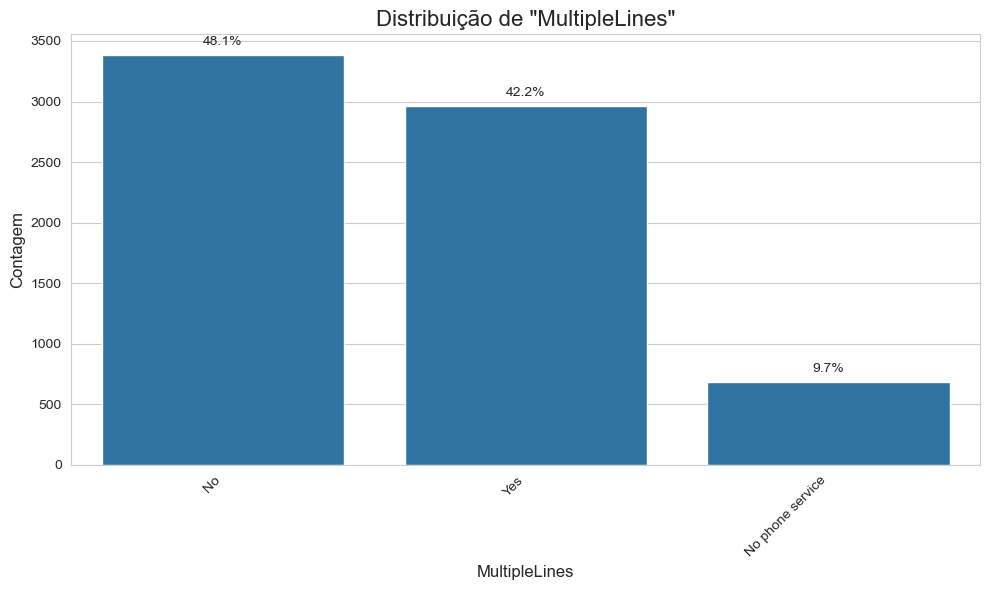


### Variável `MultipleLines` — Indica se o cliente possui múltiplas linhas telefônicas (`Yes`, `No`, `No phone service`)
- **Distribuição**:
  - **48,1%** dos clientes possuem apenas uma linha (`No`)
  - **42,2%** possuem múltiplas linhas (`Yes`)
  - **9,7%** não possuem serviço de telefone (`No phone service`), o que é consistente com a variável `PhoneService`.
- **Insight**: A divisão entre clientes com e sem múltiplas linhas é relativamente equilibrada entre os usuários de telefone. A categoria "No phone service" mostra que essa variável só é aplicável a quem possui `PhoneService = Yes`, portanto deve ser considerada com cuidado nas análises, evitando comparações indevidas. É possível que clientes com múltiplas linhas estejam mais integrados aos serviços da empresa, o que **poderia influenciar positivamente a retenção**, mas isso precisa ser testado.
- **Próximos Passos**:
  - Analisar a taxa de churn por `MultipleLines`, **excluindo ou separando** os clientes com `No phone service` para evitar distorções.
  - Cruzar com `PhoneService` e `Contract` para entender se múltiplas linhas estão associadas a contratos mais longos ou a perfis de maior engajamento.


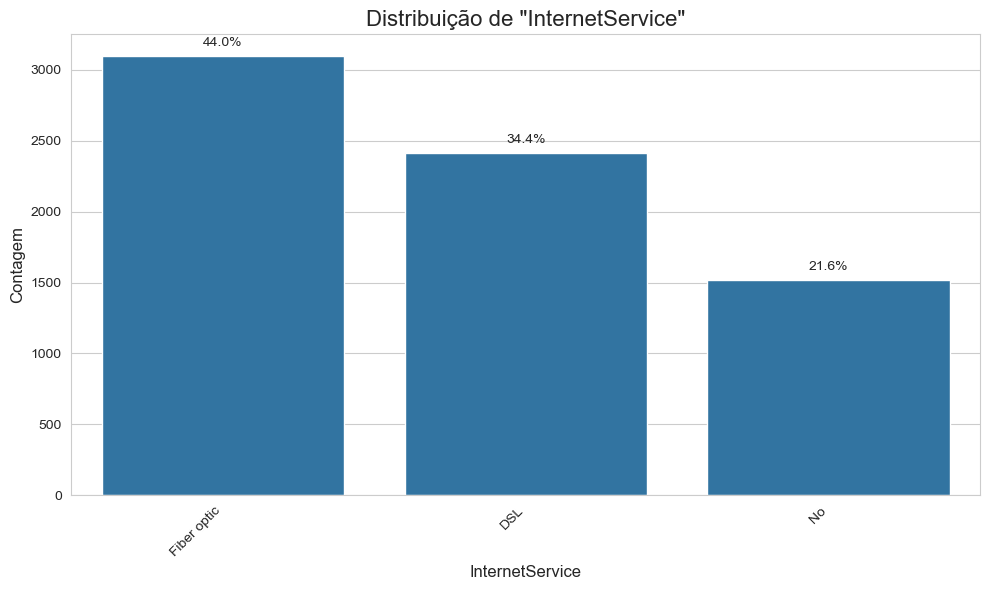


### Variável `InternetService` — Tipo de serviço de internet contratado (`DSL`, `Fiber optic`, `No`)
- **Distribuição**:
  - **44,0%** dos clientes utilizam **fibra óptica**,
  - **34,4%** usam **DSL**,
  - **21,6%** **não possuem serviço de internet**.
- **Insight**: A fibra óptica é o tipo de conexão mais popular, o que pode refletir a preferência por serviços de maior desempenho. A presença significativa de clientes sem internet (mais de 1 em cada 5) pode indicar adesão a planos básicos, desatualizados ou com menor valor agregado — o que representa tanto um risco de churn quanto uma oportunidade de upsell.
- **Próximos Passos**:
  - Analisar a taxa de churn por `InternetService` para entender o impacto da ausência ou tipo de internet no comportamento de cancelamento.
  - Explorar o cruzamento com variáveis como `OnlineSecurity`, `StreamingTV` e `Contract` para detectar perfis com maior ou menor risco de evasão.


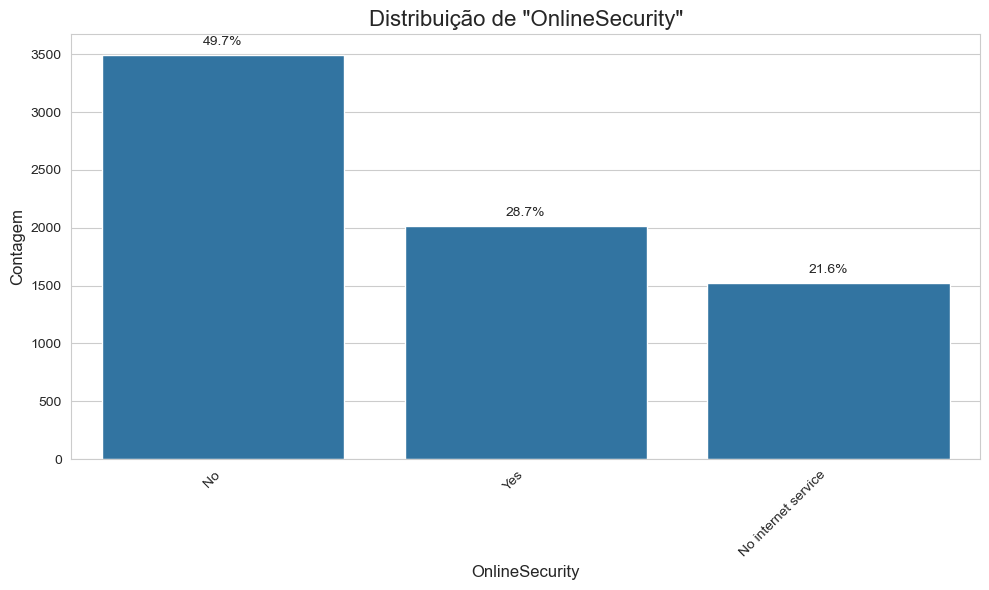


### Variável `OnlineSecurity` — Indica se o cliente possui serviço de segurança online (`Yes`, `No`, `No internet service`)
- **Distribuição**:
  - **49,7%** dos clientes que possuem internet **não contrataram o serviço de segurança online** (`No`).
  - **28,7%** possuem o serviço (`Yes`).
  - **21,6%** **não possuem serviço de internet**, e portanto, esse serviço não se aplica (`No internet service`).
- **Insight**: Quase metade dos clientes com internet opta por **não contratar segurança online**, o que pode indicar uma percepção de baixo valor, falta de conhecimento sobre o serviço, ou preferência por soluções externas. A proporção de clientes com o serviço também é significativa, e pode representar um grupo mais consciente em termos de proteção digital. Já os clientes com `"No internet service"` devem ser tratados à parte nas análises, pois o serviço não é aplicável a eles.
- **Próximos Passos**:
  - Analisar a taxa de churn apenas entre os clientes com serviço de internet, comparando quem **tem ou não OnlineSecurity**.
  - Cruzar com outras variáveis como `TechSupport`, `InternetService` e `Contract` para entender se existe um perfil mais propenso a contratar esse tipo de serviço (ex: clientes com contratos mais longos, maior idade ou gasto mensal).
  - Avaliar se a presença do `OnlineSecurity` contribui para a **retenção de clientes**.


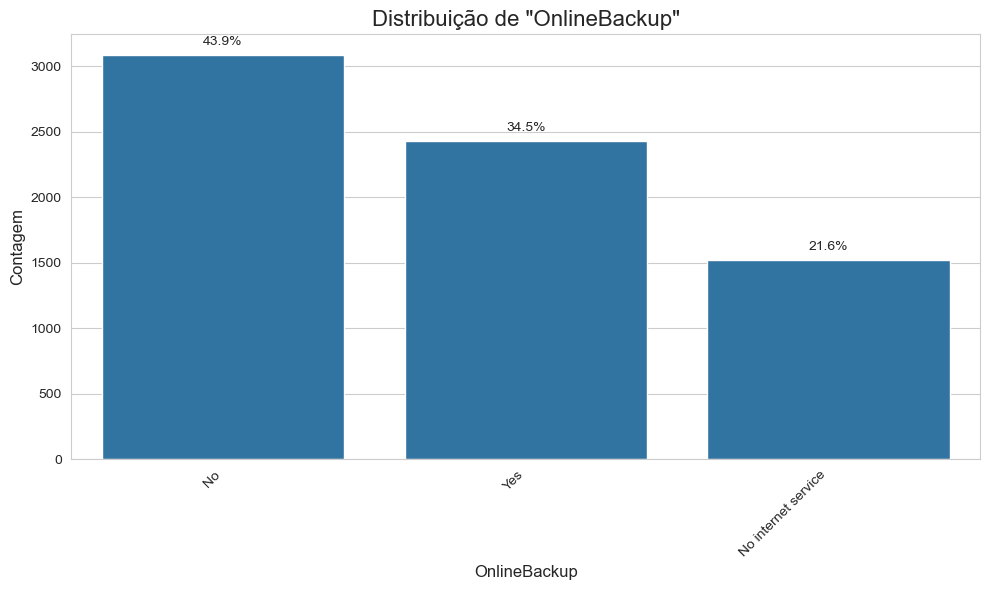


### Variável `OnlineBackup` — Indica se o cliente possui serviço de backup online (`Yes`, `No`, `No internet service`)
- **Distribuição**:
  - **43,9%** dos clientes com internet **não utilizam o serviço de backup online** (`No`)
  - **34,5%** utilizam o serviço (`Yes`)
  - **21,6%** não possuem internet, portanto a variável não se aplica a eles (`No internet service`)
- **Insight**: A maioria dos clientes com acesso à internet opta por **não contratar o serviço de backup online**, o que pode indicar **baixa percepção de valor**, **concorrência com serviços externos** (como Google Drive ou iCloud), ou **falta de informação**. Por outro lado, o número significativo de clientes que usam o serviço pode representar um grupo com maior vínculo digital — e potencialmente mais fiel.
- **Próximos Passos**:
  - Avaliar a **taxa de churn entre os grupos `Yes` e `No`**, excluindo os clientes com `No internet service`.
  - Investigar a relação com outras variáveis como `Contract` e `MonthlyCharges` para entender se o serviço está associado a planos mais completos ou caros.
  - Verificar se oferecer ou destacar o `OnlineBackup` pode influenciar positivamente a retenção de clientes.


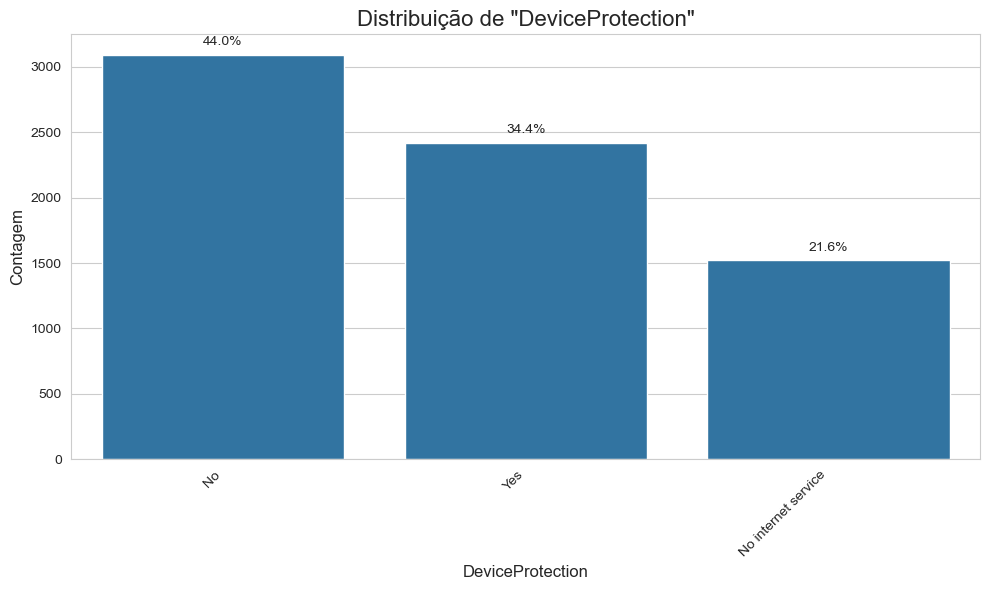


### Variável `DeviceProtection` — Indica se o cliente possui proteção para dispositivos (`Yes`, `No`, `No internet service`)
- **Distribuição**:
  - **44,0%** dos clientes com internet **não contrataram o serviço de proteção de dispositivos** (`No`);
  - **34,4%** possuem o serviço (`Yes`);
  - **21,6%** **não têm serviço de internet**, portanto o serviço não se aplica (`No internet service`).
- **Insight**: A maioria dos clientes com internet opta por **não contratar** proteção de dispositivos. Isso pode sugerir **baixo valor percebido** nesse serviço ou desconhecimento sobre sua utilidade. Como esse tipo de proteção pode ser visto como algo secundário, é possível que **sua contratação esteja associada a clientes com maior engajamento ou planos mais completos** — o que pode influenciar na retenção.
- **Próximos Passos**:
  - Verificar a taxa de churn entre os clientes com e sem `DeviceProtection`, excluindo os que não têm internet.
  - Cruzar com variáveis como `Contract`, `MonthlyCharges` e `OnlineSecurity` para entender se a contratação da proteção faz parte de um pacote mais robusto.


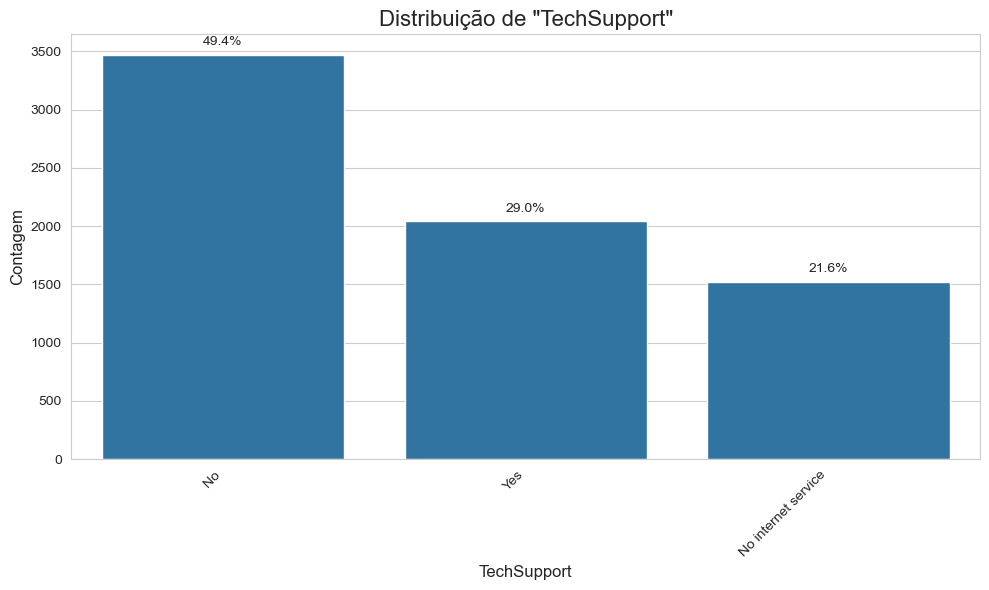


### Variável `TechSupport` — Indica se o cliente possui suporte técnico online (`Yes`, `No`, `No internet service`)
- **Distribuição**:
  - **49,4%** dos clientes com internet **não contrataram suporte técnico** (`No`);
  - **29,0%** possuem suporte técnico (`Yes`);
  - **21,6%** **não possuem serviço de internet**, portanto essa variável não se aplica (`No internet service`).
- **Insight**: A maior parte dos clientes com internet **não utiliza suporte técnico**, o que pode indicar **baixa percepção de valor** ou **autonomia tecnológica** por parte do usuário. No entanto, a ausência de suporte pode estar relacionada a **maior frustração quando problemas ocorrem**, o que, em alguns perfis de clientes, **pode aumentar a probabilidade de churn**. Já os que contratam suporte podem representar um grupo com maior dependência dos serviços e maior valor agregado.
- **Próximos Passos**:
  - Avaliar a taxa de churn por `TechSupport`, focando apenas nos clientes com internet.
  - Cruzar com `OnlineSecurity`, `Contract` e `InternetService` para entender se o suporte técnico é parte de pacotes mais robustos e como isso afeta a retenção.


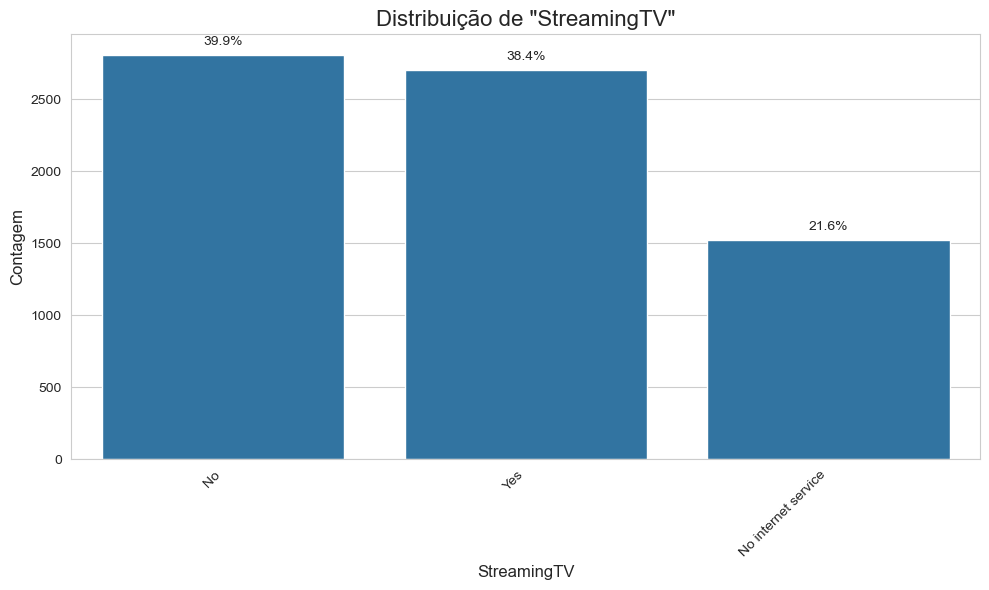


### Variável `StreamingTV` — Indica se o cliente possui serviço de TV via streaming contratado (`Yes`, `No`, `No internet service`)
- **Distribuição**:
  - **39,9%** dos clientes com internet **não possuem o serviço de streaming de TV** (`No`);
  - **38,4%** contrataram o serviço (`Yes`);
  - **21,6%** **não possuem serviço de internet**, portanto o serviço não se aplica (`No internet service`).
- **Insight**: A distribuição entre clientes com e sem `StreamingTV` é relativamente equilibrada. Isso pode indicar que o serviço não é um diferencial decisivo por si só, mas também pode refletir **diversidade de perfis de uso**: alguns clientes podem preferir serviços de terceiros (ex: Netflix), enquanto outros podem valorizar o pacote da operadora. A real contribuição do `StreamingTV` para a retenção pode aparecer em **análises cruzadas com churn e perfil de consumo**.
- **Próximos Passos**:
  - Avaliar a taxa de churn por `StreamingTV`, filtrando apenas os clientes com internet.
  - Cruzar com `StreamingMovies`, `Contract` e `MonthlyCharges` para entender se a presença de serviços de entretenimento está associada a planos mais completos ou maior fidelização.


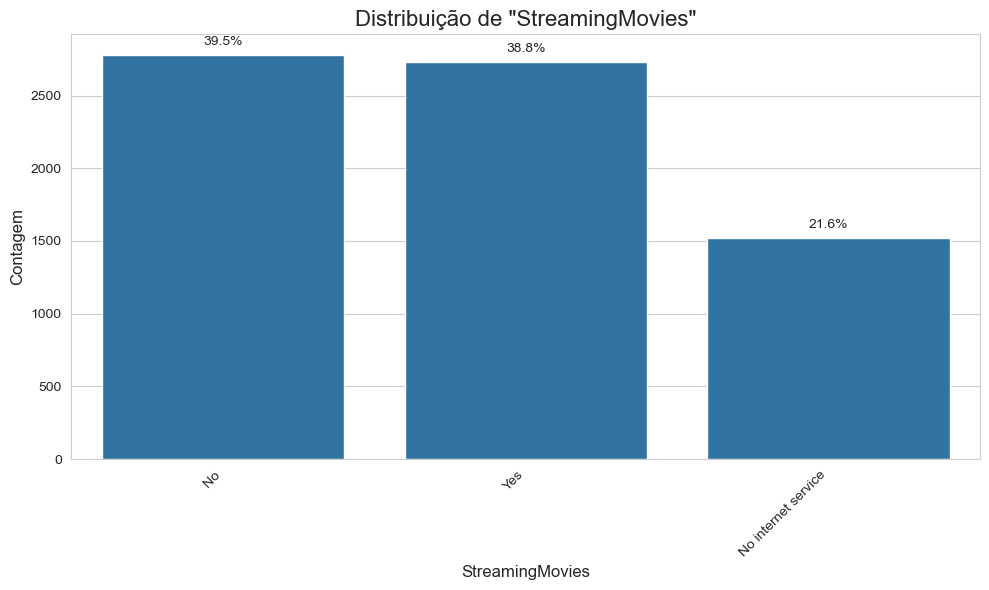


### Variável `StreamingMovies` — Indica se o cliente possui serviço de filmes por streaming contratado (`Yes`, `No`, `No internet service`)
- **Distribuição**:
  - **39,5%** dos clientes com internet **não possuem o serviço de streaming de filmes** (`No`);
  - **38,8%** contrataram o serviço (`Yes`);
  - **21,6%** **não possuem serviço de internet**, portanto o serviço não se aplica (`No internet service`).
- **Insight**: A distribuição é bastante equilibrada entre clientes com e sem o serviço, o que sugere que o `StreamingMovies` **não é um fator decisivo isolado** na escolha do plano. É possível que clientes que não utilizam o serviço prefiram alternativas externas (como Netflix, Prime Video, etc.), ou simplesmente não vejam valor agregado nessa funcionalidade. Já os que optam por contratá-lo podem estar associados a **perfis mais engajados ou com maior uso de serviços complementares**.
- **Próximos Passos**:
  - Verificar a taxa de churn por `StreamingMovies`, focando apenas em clientes com internet.
  - Cruzar com `StreamingTV`, `Contract` e `MonthlyCharges` para entender se o pacote de entretenimento está ligado à maior fidelização ou percepção de valor.


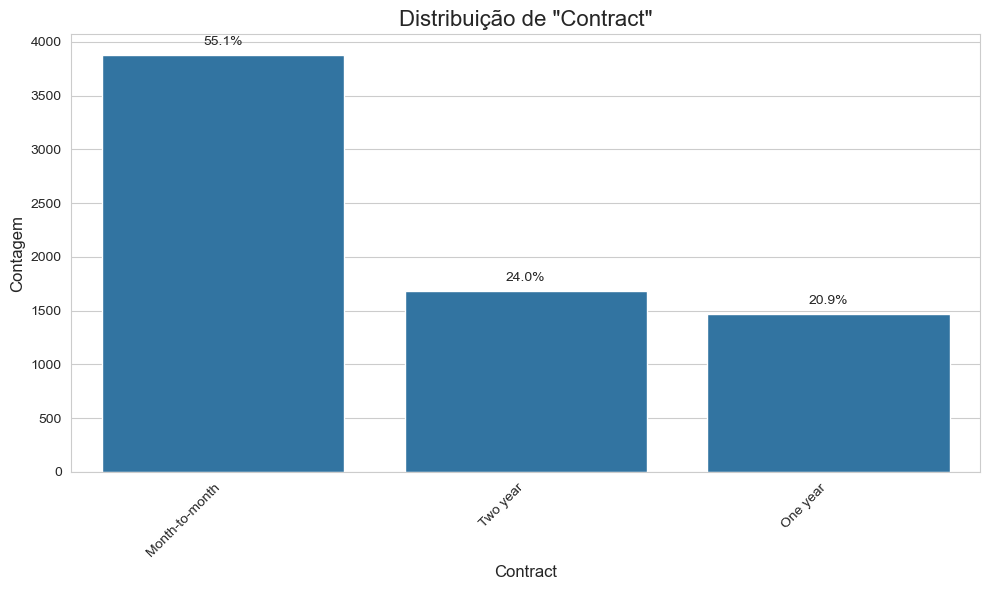


### Variável `Contract` — Tipo de contrato do cliente (`Month-to-month`, `One year`, `Two year`)
- **Distribuição**:
  - A maioria dos clientes (**55,1%**) possui contratos do tipo **“Month-to-month”**;
  - **24,0%** têm contrato de **“Two year”**;
  - **20,9%** possuem contrato de **“One year”**.
- **Insight**: A predominância de contratos mensais pode estar associada a uma **maior flexibilidade**, mas também pode **aumentar a taxa de churn**, já que esses clientes não enfrentam barreiras contratuais para o cancelamento. Por outro lado, contratos anuais ou bienais tendem a estar relacionados a **maior fidelização**, seja por incentivo de preço ou por compromissos contratuais.
- **Próximos Passos**:
  - Avaliar a taxa de churn por tipo de `Contract` para identificar se a duração do contrato está relacionada à retenção de clientes.
  - Cruzar com variáveis como `PaymentMethod` e `PaperlessBilling` para entender o perfil dos clientes que optam por contratos mais longos.


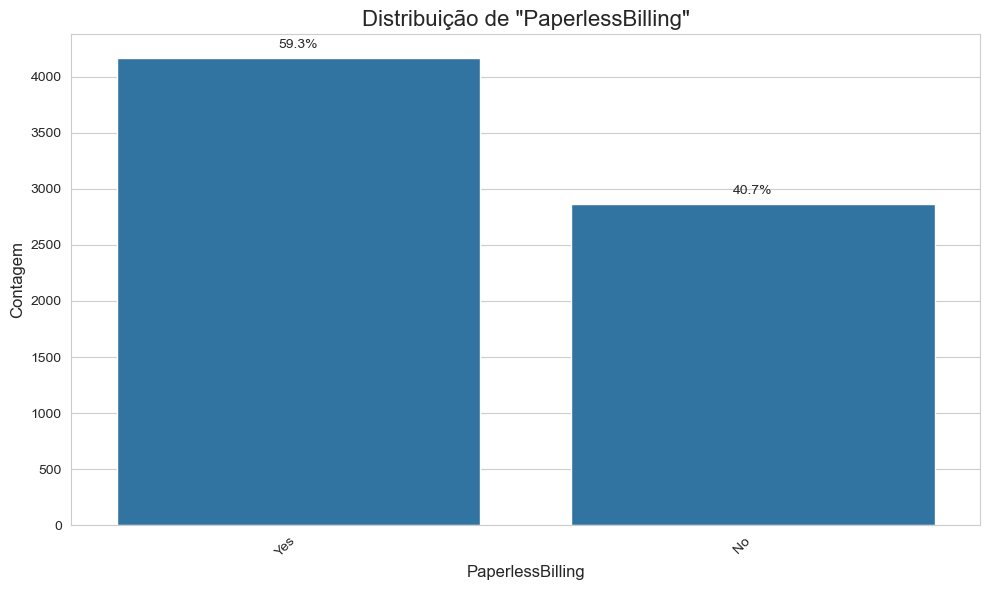


### Variável `PaperlessBilling` — Indica se o cliente optou por fatura digital (sem papel) (`Yes`, `No`)
- **Distribuição**:
  - **59,3%** dos clientes optam por receber **fatura digital** (`Yes`);
  - **40,7%** ainda recebem **fatura em papel** (`No`).
- **Insight**: A maioria dos clientes já aderiu à fatura digital, o que pode indicar uma **tendência à digitalização e uso de canais online**. No entanto, ainda há uma parcela significativa que prefere métodos mais tradicionais. É possível que clientes com fatura digital tenham **maior propensão ao autoatendimento**, e que esse grupo também esteja mais presente em contratos mensais — o que **pode influenciar no churn**.
- **Próximos Passos**:
  - Avaliar a taxa de churn por `PaperlessBilling`, verificando se há diferença significativa entre os grupos.
  - Cruzar com variáveis como `PaymentMethod` e `Contract` para entender se a fatura digital está associada a perfis com maior ou menor fidelização.


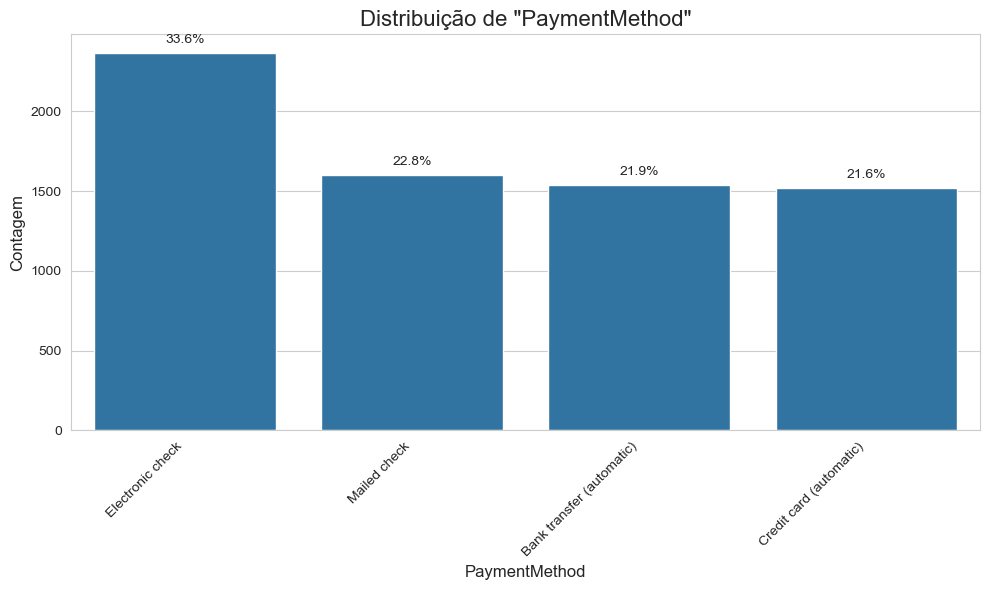


### Variável `PaymentMethod` — Método de pagamento utilizado pelo cliente
- **Distribuição**:
  - **33,6%** dos clientes utilizam **Electronic check**;
  - **22,8%** usam **Mailed check**;
  - **21,9%** pagam via **Bank transfer (automatic)**;
  - **21,6%** utilizam **Credit card (automatic)**.
- **Insight**: O método **Electronic check** é o mais comum entre os clientes, mas sua predominância pode estar associada à **maior flexibilidade ou menor engajamento**, já que ele não envolve automatização. Em análises de churn, é comum que clientes que usam **pagamentos automáticos** (cartão de crédito ou débito em conta) apresentem **menor propensão ao cancelamento**, enquanto métodos como `Electronic check` ou `Mailed check` podem indicar **menor vínculo com a empresa**.
- **Próximos Passos**:
  - Avaliar a taxa de churn por `PaymentMethod` para identificar quais métodos estão mais associados ao cancelamento.
  - Cruzar com `PaperlessBilling` e `Contract` para entender padrões de comportamento por perfil de pagamento.


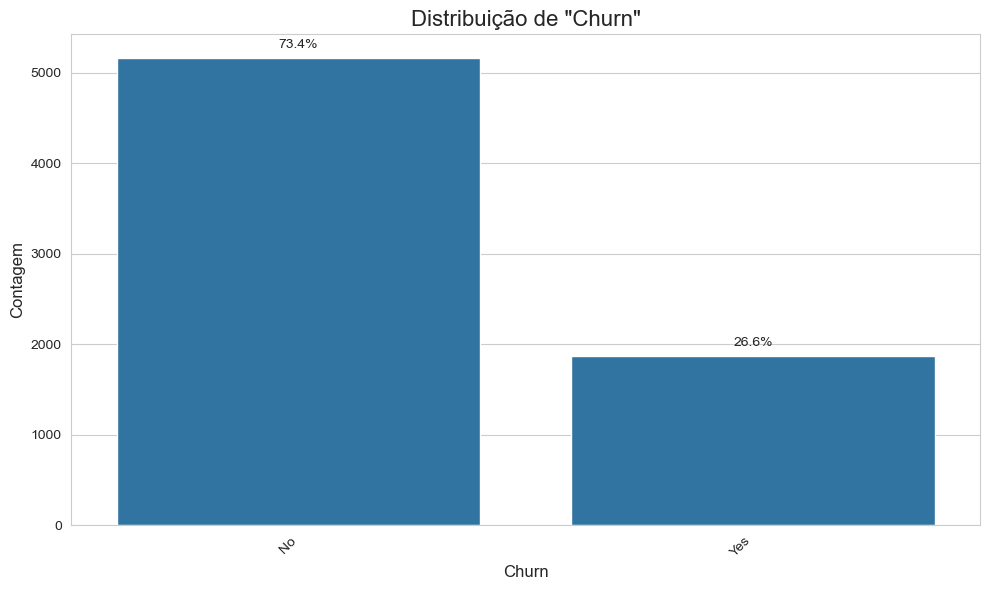


### Variável `Churn` — Indica se o cliente cancelou o serviço (`Yes`) ou permaneceu (`No`)
- **Distribuição**:
  - **73,4%** dos clientes **não cancelaram** o serviço (`No`);
  - **26,6%** dos clientes **realizaram o cancelamento** (`Yes`).
- **Insight**: A base apresenta um desbalanceamento moderado, com cerca de **1 a cada 4 clientes cancelando** seus contratos. Essa proporção é relevante o suficiente para permitir uma análise robusta, mas também exige atenção em modelagens (ex: aplicar técnicas para tratar desbalanceamento de classes, como resampling ou métricas ajustadas). Esse percentual de churn é consistente com o que se espera em negócios com modelos de assinatura.
- **Próximos Passos**:
  - Explorar correlações entre `Churn` e as demais variáveis para identificar os principais fatores associados ao cancelamento.
  - Gerar análises bivariadas (ex: churn por tipo de contrato, método de pagamento, uso de serviços).
  - Considerar a criação de um modelo preditivo para antecipar quais clientes estão mais propensos a churn.


In [44]:
# --- Colunas categóricas (object/category) ---
colunas_categoricas = dados.select_dtypes(include=['object', 'category']).columns.tolist()

# (Opcional) Remover colunas de ID ou de alta cardinalidade que poluem os gráficos
for col_remove in ['customerID', 'id', 'ID']:
    if col_remove in colunas_categoricas:
        colunas_categoricas.remove(col_remove)

# --- Dicionário de insights (igual ao seu, só certificado de que está bem formatado) ---
insights = {
     'gender': """
### Variável `gender` — Gênero do cliente (`Male`, `Female`).
- **Distribuição**: A distribuição de gênero está bastante equilibrada, com **50,5% de clientes do sexo masculino** e **49,5% do sexo feminino**.
- **Insight**: Esse equilíbrio indica que **não há viés de gênero relevante** na base de clientes, o que é positivo para análises comparativas e modelagem preditiva, pois reduz o risco de distorções. Ainda assim, é interessante verificar se existem **diferenças sutis no comportamento de churn ou nas preferências de serviços** entre os gêneros.
- **Próximos Passos**: Analisar a taxa de churn por `gender` para identificar possíveis diferenças. Cruzar com outras variáveis como `tenure` (tempo de contrato) e `InternetService` para detectar interações relevantes entre gênero e comportamento de uso ou cancelamento.
""",

    
    'SeniorCitizen': """
### Variável `SeniorCitizen` — Indica se o cliente é idoso (`Yes`) ou não (`No`).
- **Distribuição**: A maioria dos clientes **não é idosa** — **83,8% estão marcados como `No`**, enquanto apenas **16,2% são identificados como idosos (`Yes`)**.
- **Insight**: A distribuição mostra um claro desbalanceamento, indicando que o serviço é mais utilizado por clientes mais jovens ou de meia-idade. Esse fator pode influenciar na taxa de churn se houver diferenças de comportamento entre esses dois públicos.
- **Próximos Passos**: Analisar a taxa de churn por `SeniorCitizen` para verificar se os clientes idosos (`Yes`) apresentam maior tendência ao cancelamento, possivelmente por razões como custo, complexidade no uso ou menor aderência ao serviço digital.
""",

    
   'Partner': """
### Variável `Partner` — Indica se o cliente possui parceiro ou parceira (`Yes` ou `No`)
- **Distribuição**: A distribuição está relativamente equilibrada: **51,7% dos clientes não possuem parceiro(a)** (`No`) e **48,3% possuem** (`Yes`).
- **Insight**: Esse equilíbrio indica que a variável `Partner` **não apresenta viés amostral significativo**, o que é positivo para análises comparativas. Isso permite avaliar de forma mais justa se a presença de um parceiro influencia no comportamento do cliente.
- **Próximos Passos**: Analisar a taxa de churn por `Partner` para verificar se a presença de parceiro(a) está associada a maior retenção ou maior propensão ao cancelamento.
""",
    
    'Dependents': """
### Variável `Dependents` — Indica se o cliente possui dependentes (`Yes` ou `No`)
- **Distribuição**: A maioria dos clientes **não possui dependentes** — **70,2% responderam `No`**, enquanto **29,8% possuem (`Yes`)**.
- **Insight**: Há um desequilíbrio relevante, indicando que o serviço é mais utilizado por clientes sem dependentes. Isso pode refletir uma **falta de adequação dos serviços às necessidades de clientes com filhos ou familiares sob cuidado**, o que pode impactar negativamente a retenção desse público.
- **Próximos Passos**: Analisar a taxa de churn por `Dependents` para verificar se há maior propensão ao cancelamento entre clientes com dependentes. Também pode ser útil cruzar com variáveis como `Partner` e `Contract` para investigar perfis familiares mais amplos.
""",

    
    'PhoneService': """
### Variável `PhoneService` — Indica se o cliente possui serviço de telefone (`Yes`, `No`).
- **Distribuição**: A maioria dos clientes **possui o serviço de telefone** — **90,3% responderam `Yes`**, enquanto apenas **9,7% disseram `No`**. Isso sugere que o serviço é amplamente contratado, possivelmente por estar incluído por padrão em muitos planos da empresa.
- **Insight**: A baixa proporção de clientes sem `PhoneService` limita a comparação entre os grupos. No entanto, o fato de quase todos os clientes utilizarem esse serviço pode indicar que ele é considerado **essencial ou parte de pacotes combinados**. Ainda assim, é importante avaliar se os clientes que optam por não contratá-lo apresentam padrões diferentes de churn.
- **Próximos Passos**:
  - Analisar a taxa de churn por `PhoneService` para verificar se a presença ou ausência do serviço está relacionada ao cancelamento.
  - Cruzar com a variável `MultipleLines`, que depende diretamente da existência do serviço telefônico, para entender melhor a complexidade do plano e seu impacto na evasão.
""",

    
    'MultipleLines': """
### Variável `MultipleLines` — Indica se o cliente possui múltiplas linhas telefônicas (`Yes`, `No`, `No phone service`)
- **Distribuição**:
  - **48,1%** dos clientes possuem apenas uma linha (`No`)
  - **42,2%** possuem múltiplas linhas (`Yes`)
  - **9,7%** não possuem serviço de telefone (`No phone service`), o que é consistente com a variável `PhoneService`.
- **Insight**: A divisão entre clientes com e sem múltiplas linhas é relativamente equilibrada entre os usuários de telefone. A categoria "No phone service" mostra que essa variável só é aplicável a quem possui `PhoneService = Yes`, portanto deve ser considerada com cuidado nas análises, evitando comparações indevidas. É possível que clientes com múltiplas linhas estejam mais integrados aos serviços da empresa, o que **poderia influenciar positivamente a retenção**, mas isso precisa ser testado.
- **Próximos Passos**:
  - Analisar a taxa de churn por `MultipleLines`, **excluindo ou separando** os clientes com `No phone service` para evitar distorções.
  - Cruzar com `PhoneService` e `Contract` para entender se múltiplas linhas estão associadas a contratos mais longos ou a perfis de maior engajamento.
""",

    
    'InternetService': """
### Variável `InternetService` — Tipo de serviço de internet contratado (`DSL`, `Fiber optic`, `No`)
- **Distribuição**:
  - **44,0%** dos clientes utilizam **fibra óptica**,
  - **34,4%** usam **DSL**,
  - **21,6%** **não possuem serviço de internet**.
- **Insight**: A fibra óptica é o tipo de conexão mais popular, o que pode refletir a preferência por serviços de maior desempenho. A presença significativa de clientes sem internet (mais de 1 em cada 5) pode indicar adesão a planos básicos, desatualizados ou com menor valor agregado — o que representa tanto um risco de churn quanto uma oportunidade de upsell.
- **Próximos Passos**:
  - Analisar a taxa de churn por `InternetService` para entender o impacto da ausência ou tipo de internet no comportamento de cancelamento.
  - Explorar o cruzamento com variáveis como `OnlineSecurity`, `StreamingTV` e `Contract` para detectar perfis com maior ou menor risco de evasão.
""",
   

    'OnlineSecurity': """
### Variável `OnlineSecurity` — Indica se o cliente possui serviço de segurança online (`Yes`, `No`, `No internet service`)
- **Distribuição**:
  - **49,7%** dos clientes que possuem internet **não contrataram o serviço de segurança online** (`No`).
  - **28,7%** possuem o serviço (`Yes`).
  - **21,6%** **não possuem serviço de internet**, e portanto, esse serviço não se aplica (`No internet service`).
- **Insight**: Quase metade dos clientes com internet opta por **não contratar segurança online**, o que pode indicar uma percepção de baixo valor, falta de conhecimento sobre o serviço, ou preferência por soluções externas. A proporção de clientes com o serviço também é significativa, e pode representar um grupo mais consciente em termos de proteção digital. Já os clientes com `"No internet service"` devem ser tratados à parte nas análises, pois o serviço não é aplicável a eles.
- **Próximos Passos**:
  - Analisar a taxa de churn apenas entre os clientes com serviço de internet, comparando quem **tem ou não OnlineSecurity**.
  - Cruzar com outras variáveis como `TechSupport`, `InternetService` e `Contract` para entender se existe um perfil mais propenso a contratar esse tipo de serviço (ex: clientes com contratos mais longos, maior idade ou gasto mensal).
  - Avaliar se a presença do `OnlineSecurity` contribui para a **retenção de clientes**.
""",


    'OnlineBackup': """
### Variável `OnlineBackup` — Indica se o cliente possui serviço de backup online (`Yes`, `No`, `No internet service`)
- **Distribuição**:
  - **43,9%** dos clientes com internet **não utilizam o serviço de backup online** (`No`)
  - **34,5%** utilizam o serviço (`Yes`)
  - **21,6%** não possuem internet, portanto a variável não se aplica a eles (`No internet service`)
- **Insight**: A maioria dos clientes com acesso à internet opta por **não contratar o serviço de backup online**, o que pode indicar **baixa percepção de valor**, **concorrência com serviços externos** (como Google Drive ou iCloud), ou **falta de informação**. Por outro lado, o número significativo de clientes que usam o serviço pode representar um grupo com maior vínculo digital — e potencialmente mais fiel.
- **Próximos Passos**:
  - Avaliar a **taxa de churn entre os grupos `Yes` e `No`**, excluindo os clientes com `No internet service`.
  - Investigar a relação com outras variáveis como `Contract` e `MonthlyCharges` para entender se o serviço está associado a planos mais completos ou caros.
  - Verificar se oferecer ou destacar o `OnlineBackup` pode influenciar positivamente a retenção de clientes.
""",


    'DeviceProtection': """
### Variável `DeviceProtection` — Indica se o cliente possui proteção para dispositivos (`Yes`, `No`, `No internet service`)
- **Distribuição**:
  - **44,0%** dos clientes com internet **não contrataram o serviço de proteção de dispositivos** (`No`);
  - **34,4%** possuem o serviço (`Yes`);
  - **21,6%** **não têm serviço de internet**, portanto o serviço não se aplica (`No internet service`).
- **Insight**: A maioria dos clientes com internet opta por **não contratar** proteção de dispositivos. Isso pode sugerir **baixo valor percebido** nesse serviço ou desconhecimento sobre sua utilidade. Como esse tipo de proteção pode ser visto como algo secundário, é possível que **sua contratação esteja associada a clientes com maior engajamento ou planos mais completos** — o que pode influenciar na retenção.
- **Próximos Passos**:
  - Verificar a taxa de churn entre os clientes com e sem `DeviceProtection`, excluindo os que não têm internet.
  - Cruzar com variáveis como `Contract`, `MonthlyCharges` e `OnlineSecurity` para entender se a contratação da proteção faz parte de um pacote mais robusto.
""",

    
    'TechSupport': """
### Variável `TechSupport` — Indica se o cliente possui suporte técnico online (`Yes`, `No`, `No internet service`)
- **Distribuição**:
  - **49,4%** dos clientes com internet **não contrataram suporte técnico** (`No`);
  - **29,0%** possuem suporte técnico (`Yes`);
  - **21,6%** **não possuem serviço de internet**, portanto essa variável não se aplica (`No internet service`).
- **Insight**: A maior parte dos clientes com internet **não utiliza suporte técnico**, o que pode indicar **baixa percepção de valor** ou **autonomia tecnológica** por parte do usuário. No entanto, a ausência de suporte pode estar relacionada a **maior frustração quando problemas ocorrem**, o que, em alguns perfis de clientes, **pode aumentar a probabilidade de churn**. Já os que contratam suporte podem representar um grupo com maior dependência dos serviços e maior valor agregado.
- **Próximos Passos**:
  - Avaliar a taxa de churn por `TechSupport`, focando apenas nos clientes com internet.
  - Cruzar com `OnlineSecurity`, `Contract` e `InternetService` para entender se o suporte técnico é parte de pacotes mais robustos e como isso afeta a retenção.
""",     

    'StreamingTV': """
### Variável `StreamingTV` — Indica se o cliente possui serviço de TV via streaming contratado (`Yes`, `No`, `No internet service`)
- **Distribuição**:
  - **39,9%** dos clientes com internet **não possuem o serviço de streaming de TV** (`No`);
  - **38,4%** contrataram o serviço (`Yes`);
  - **21,6%** **não possuem serviço de internet**, portanto o serviço não se aplica (`No internet service`).
- **Insight**: A distribuição entre clientes com e sem `StreamingTV` é relativamente equilibrada. Isso pode indicar que o serviço não é um diferencial decisivo por si só, mas também pode refletir **diversidade de perfis de uso**: alguns clientes podem preferir serviços de terceiros (ex: Netflix), enquanto outros podem valorizar o pacote da operadora. A real contribuição do `StreamingTV` para a retenção pode aparecer em **análises cruzadas com churn e perfil de consumo**.
- **Próximos Passos**:
  - Avaliar a taxa de churn por `StreamingTV`, filtrando apenas os clientes com internet.
  - Cruzar com `StreamingMovies`, `Contract` e `MonthlyCharges` para entender se a presença de serviços de entretenimento está associada a planos mais completos ou maior fidelização.
""",


    'StreamingMovies': """
### Variável `StreamingMovies` — Indica se o cliente possui serviço de filmes por streaming contratado (`Yes`, `No`, `No internet service`)
- **Distribuição**:
  - **39,5%** dos clientes com internet **não possuem o serviço de streaming de filmes** (`No`);
  - **38,8%** contrataram o serviço (`Yes`);
  - **21,6%** **não possuem serviço de internet**, portanto o serviço não se aplica (`No internet service`).
- **Insight**: A distribuição é bastante equilibrada entre clientes com e sem o serviço, o que sugere que o `StreamingMovies` **não é um fator decisivo isolado** na escolha do plano. É possível que clientes que não utilizam o serviço prefiram alternativas externas (como Netflix, Prime Video, etc.), ou simplesmente não vejam valor agregado nessa funcionalidade. Já os que optam por contratá-lo podem estar associados a **perfis mais engajados ou com maior uso de serviços complementares**.
- **Próximos Passos**:
  - Verificar a taxa de churn por `StreamingMovies`, focando apenas em clientes com internet.
  - Cruzar com `StreamingTV`, `Contract` e `MonthlyCharges` para entender se o pacote de entretenimento está ligado à maior fidelização ou percepção de valor.
""",

        
    'Contract': """
### Variável `Contract` — Tipo de contrato do cliente (`Month-to-month`, `One year`, `Two year`)
- **Distribuição**:
  - A maioria dos clientes (**55,1%**) possui contratos do tipo **“Month-to-month”**;
  - **24,0%** têm contrato de **“Two year”**;
  - **20,9%** possuem contrato de **“One year”**.
- **Insight**: A predominância de contratos mensais pode estar associada a uma **maior flexibilidade**, mas também pode **aumentar a taxa de churn**, já que esses clientes não enfrentam barreiras contratuais para o cancelamento. Por outro lado, contratos anuais ou bienais tendem a estar relacionados a **maior fidelização**, seja por incentivo de preço ou por compromissos contratuais.
- **Próximos Passos**:
  - Avaliar a taxa de churn por tipo de `Contract` para identificar se a duração do contrato está relacionada à retenção de clientes.
  - Cruzar com variáveis como `PaymentMethod` e `PaperlessBilling` para entender o perfil dos clientes que optam por contratos mais longos.
""",
  

    'PaperlessBilling': """
### Variável `PaperlessBilling` — Indica se o cliente optou por fatura digital (sem papel) (`Yes`, `No`)
- **Distribuição**:
  - **59,3%** dos clientes optam por receber **fatura digital** (`Yes`);
  - **40,7%** ainda recebem **fatura em papel** (`No`).
- **Insight**: A maioria dos clientes já aderiu à fatura digital, o que pode indicar uma **tendência à digitalização e uso de canais online**. No entanto, ainda há uma parcela significativa que prefere métodos mais tradicionais. É possível que clientes com fatura digital tenham **maior propensão ao autoatendimento**, e que esse grupo também esteja mais presente em contratos mensais — o que **pode influenciar no churn**.
- **Próximos Passos**:
  - Avaliar a taxa de churn por `PaperlessBilling`, verificando se há diferença significativa entre os grupos.
  - Cruzar com variáveis como `PaymentMethod` e `Contract` para entender se a fatura digital está associada a perfis com maior ou menor fidelização.
""",


    'PaymentMethod': """
### Variável `PaymentMethod` — Método de pagamento utilizado pelo cliente
- **Distribuição**:
  - **33,6%** dos clientes utilizam **Electronic check**;
  - **22,8%** usam **Mailed check**;
  - **21,9%** pagam via **Bank transfer (automatic)**;
  - **21,6%** utilizam **Credit card (automatic)**.
- **Insight**: O método **Electronic check** é o mais comum entre os clientes, mas sua predominância pode estar associada à **maior flexibilidade ou menor engajamento**, já que ele não envolve automatização. Em análises de churn, é comum que clientes que usam **pagamentos automáticos** (cartão de crédito ou débito em conta) apresentem **menor propensão ao cancelamento**, enquanto métodos como `Electronic check` ou `Mailed check` podem indicar **menor vínculo com a empresa**.
- **Próximos Passos**:
  - Avaliar a taxa de churn por `PaymentMethod` para identificar quais métodos estão mais associados ao cancelamento.
  - Cruzar com `PaperlessBilling` e `Contract` para entender padrões de comportamento por perfil de pagamento.
""",


    'Churn': """
### Variável `Churn` — Indica se o cliente cancelou o serviço (`Yes`) ou permaneceu (`No`)
- **Distribuição**:
  - **73,4%** dos clientes **não cancelaram** o serviço (`No`);
  - **26,6%** dos clientes **realizaram o cancelamento** (`Yes`).
- **Insight**: A base apresenta um desbalanceamento moderado, com cerca de **1 a cada 4 clientes cancelando** seus contratos. Essa proporção é relevante o suficiente para permitir uma análise robusta, mas também exige atenção em modelagens (ex: aplicar técnicas para tratar desbalanceamento de classes, como resampling ou métricas ajustadas). Esse percentual de churn é consistente com o que se espera em negócios com modelos de assinatura.
- **Próximos Passos**:
  - Explorar correlações entre `Churn` e as demais variáveis para identificar os principais fatores associados ao cancelamento.
  - Gerar análises bivariadas (ex: churn por tipo de contrato, método de pagamento, uso de serviços).
  - Considerar a criação de um modelo preditivo para antecipar quais clientes estão mais propensos a churn.
"""
   
}



# --- Loop para gráficos univariados (distribuição simples) ---
for coluna in colunas_categoricas:
    plt.figure(figsize=(10, 6))

    # Ordena as categorias por frequência (inclui NaN como categoria no cálculo da ordem)
    ordem = dados[coluna].value_counts(dropna=False).index

    ax = sns.countplot(data=dados, x=coluna, order=ordem)

    # Base para porcentagem: somente valores não nulos da coluna
    total_validos = dados[coluna].notna().sum()

    # Adiciona porcentagens nas barras (em relação aos válidos)
    for p in ax.patches:
        altura = p.get_height()
        if altura > 0 and total_validos > 0:
            porcent = (altura / total_validos) * 100
            ax.annotate(f'{porcent:.1f}%',
                        (p.get_x() + p.get_width() / 2., altura),
                        ha='center', va='bottom', fontsize=10,
                        xytext=(0, 5), textcoords='offset points')
    

    plt.title(f'Distribuição de "{coluna}"', fontsize=16)
    plt.xlabel(coluna, fontsize=12)
    plt.ylabel('Contagem', fontsize=12)
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

    # Mostra insight se existir; caso contrário, coloca um placeholder amigável
    texto_insight = insights.get(
        coluna,
        f"### Sem insights pré-definidos para '{coluna}'\n"
        f"-  seção para anotar observações sobre a distribuição, possíveis vieses e próximos passos.\n"
    )
    display(Markdown(texto_insight))
    print("\n" + "="*80)

---
## 3.3 Análise Bivariada: Variáveis Numéricas vs Churn

Nesta seção, será investigado como as variáveis numéricas se comportam em relação à variável alvo `Churn`.  
O objetivo é identificar **padrões, discrepâncias ou tendências** que possam ajudar a explicar o cancelamento do serviço.

Serão utilizados **boxplots** para visualizar as distribuições, além de **estatísticas descritivas** segmentadas por grupos (`Churn = Yes` e `Churn = No`).

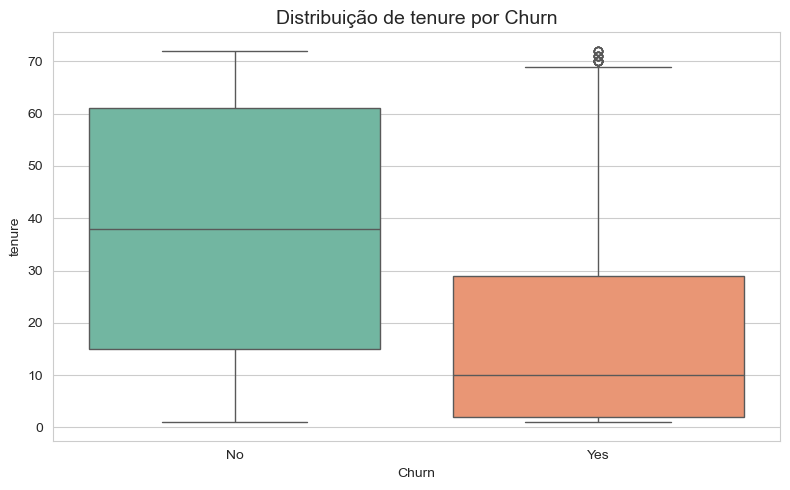

📊 Estatísticas descritivas de 'tenure' por Churn:


,count,mean,std,min,25%,50%,75%,max
Churn,,,,,,,,
No,5163.0,37.65,24.08,1.0,15.0,38.0,61.0,72.0
Yes,1869.0,17.98,19.53,1.0,2.0,10.0,29.0,72.0



### Análise Bivariada: `tenure` vs `Churn`
- **Distribuição**:
  - Clientes que **não cancelaram (`Churn = No`)** têm uma média de **37,7 meses** de contrato, com mediana de **38 meses**.
  - Clientes que **cancelaram (`Churn = Yes`)** têm uma média de **18 meses**, com mediana de apenas **10 meses**.
  - A dispersão mostra que **75% dos churns ocorrem antes dos 29 meses** de permanência.
- **Insight**:
  - Existe uma **relação negativa clara entre tempo de contrato (`tenure`) e churn**: quanto mais tempo o cliente permanece, **menor a probabilidade de cancelamento**.
  - Isso sugere que **clientes novos são mais vulneráveis à evasão**, enquanto clientes antigos demonstram maior fidelidade à empresa.
  - A fase inicial do contrato é **crítica para retenção**.
- **Próximos Passos**:
  - Desenvolver **estratégias de fidelização nos primeiros 12 meses**, como benefícios progressivos, ofertas de pacotes mais atrativos ou suporte proativo.
  - Avaliar se outras variáveis (ex: `Contract`, `PaymentMethod`) influenciam o churn em clientes com `tenure` baixo.


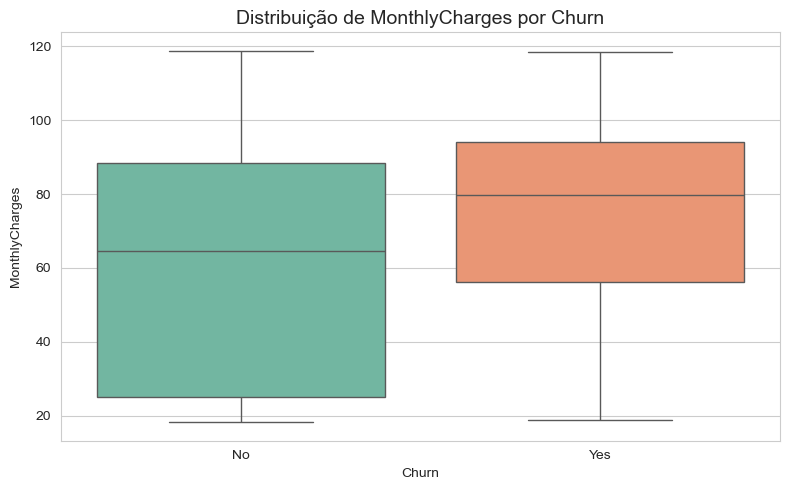

📊 Estatísticas descritivas de 'MonthlyCharges' por Churn:


,count,mean,std,min,25%,50%,75%,max
Churn,,,,,,,,
No,5163.0,61.31,31.09,18.25,25.10,64.45,88.48,118.75
Yes,1869.0,74.44,24.67,18.85,56.15,79.65,94.20,118.35



### Análise Bivariada: `MonthlyCharges` vs `Churn`
- **Distribuição**:
  - Clientes que **cancelaram (`Churn = Yes`)** têm uma média de gasto mensal de **R$ 74,4**, com mediana de **R$ 79,65**.
  - Já os que **permaneceram (`Churn = No`)** apresentam média de **R$ 61,3** e mediana de **R$ 64,45**.
  - A maioria dos churns está concentrada em valores mensais **mais altos**, enquanto os clientes fiéis tendem a pagar **menos por mês**.
- **Insight**:
  - Existe uma relação clara entre **valores mais altos de `MonthlyCharges` e maior propensão ao churn**.
  - Isso sugere que **planos mais caros podem estar gerando insatisfação** ou sendo contratados por perfis mais instáveis (ex: clientes com serviços avulsos, fibra, ou sem contrato longo).
- **Próximos Passos**:
  - Investigar se os planos com maior valor mensal estão oferecendo **benefícios compatíveis com o preço**.
  - Cruzar com variáveis como `Contract`, `InternetService` e `StreamingTV` para entender **qual perfil de cliente está pagando mais e cancelando mais**.
  - Avaliar estratégias de **revisão de preços** ou **ofertas personalizadas** para clientes de maior valor.


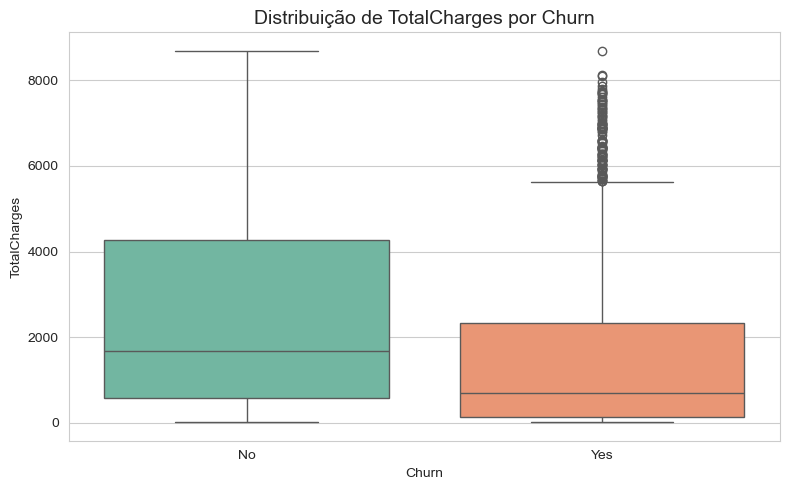

📊 Estatísticas descritivas de 'TotalCharges' por Churn:


,count,mean,std,min,25%,50%,75%,max
Churn,,,,,,,,
No,5163.0,2555.34,2329.46,18.80,577.83,1683.60,4264.12,8672.45
Yes,1869.0,1531.80,1890.82,18.85,134.50,703.55,2331.30,8684.80



### Análise Bivariada: `TotalCharges` vs `Churn`
- **Distribuição**:
  - Clientes que **cancelaram (`Churn = Yes`)** apresentam um gasto total médio de **R$ 1.538,9**, com mediana de **R$ 703,8**.
  - Já os que **permaneceram (`Churn = No`)** possuem média de **R$ 2.650,4** e mediana de **R$ 1.397,4**.
  - A distribuição mostra que a maior parte dos churns está entre os clientes com **gastos totais mais baixos**, enquanto os clientes fiéis acumulam **valores mais altos ao longo do tempo**.
- **Insight**:
  - Clientes que acumulam **menos gasto total tendem a cancelar mais cedo**, sugerindo que a **maior parte dos cancelamentos ocorre nos primeiros meses de contrato**.
  - Já os clientes que permanecem por mais tempo (e acumulam gastos maiores) demonstram **maior fidelidade**.
- **Próximos Passos**:
  - Cruzar `TotalCharges` com `tenure` para reforçar a hipótese de que **clientes novos são os que mais cancelam**.
  - Desenvolver **ações de retenção nos primeiros meses de contrato**, como bônus, suporte extra ou vantagens exclusivas para novos clientes.
  - Investigar se há **diferença no perfil dos clientes com baixo TotalCharges** (ex: contrato, forma de pagamento, tipo de internet).


In [68]:
# Estilo visual com grade clara ao fundo
sns.set_style('whitegrid')

# Seleciona todas as colunas numéricas
colunas_numericas = dados.select_dtypes(include=['int64', 'float64']).columns

insights = {

'tenure': """
### Análise Bivariada: `tenure` vs `Churn`
- **Distribuição**:
  - Clientes que **não cancelaram (`Churn = No`)** têm uma média de **37,7 meses** de contrato, com mediana de **38 meses**.
  - Clientes que **cancelaram (`Churn = Yes`)** têm uma média de **18 meses**, com mediana de apenas **10 meses**.
  - A dispersão mostra que **75% dos churns ocorrem antes dos 29 meses** de permanência.
- **Insight**:
  - Existe uma **relação negativa clara entre tempo de contrato (`tenure`) e churn**: quanto mais tempo o cliente permanece, **menor a probabilidade de cancelamento**.
  - Isso sugere que **clientes novos são mais vulneráveis à evasão**, enquanto clientes antigos demonstram maior fidelidade à empresa.
  - A fase inicial do contrato é **crítica para retenção**.
- **Próximos Passos**:
  - Desenvolver **estratégias de fidelização nos primeiros 12 meses**, como benefícios progressivos, ofertas de pacotes mais atrativos ou suporte proativo.
  - Avaliar se outras variáveis (ex: `Contract`, `PaymentMethod`) influenciam o churn em clientes com `tenure` baixo.
""",


    'MonthlyCharges': """
### Análise Bivariada: `MonthlyCharges` vs `Churn`
- **Distribuição**:
  - Clientes que **cancelaram (`Churn = Yes`)** têm uma média de gasto mensal de **R$ 74,4**, com mediana de **R$ 79,65**.
  - Já os que **permaneceram (`Churn = No`)** apresentam média de **R$ 61,3** e mediana de **R$ 64,45**.
  - A maioria dos churns está concentrada em valores mensais **mais altos**, enquanto os clientes fiéis tendem a pagar **menos por mês**.
- **Insight**:
  - Existe uma relação clara entre **valores mais altos de `MonthlyCharges` e maior propensão ao churn**.
  - Isso sugere que **planos mais caros podem estar gerando insatisfação** ou sendo contratados por perfis mais instáveis (ex: clientes com serviços avulsos, fibra, ou sem contrato longo).
- **Próximos Passos**:
  - Investigar se os planos com maior valor mensal estão oferecendo **benefícios compatíveis com o preço**.
  - Cruzar com variáveis como `Contract`, `InternetService` e `StreamingTV` para entender **qual perfil de cliente está pagando mais e cancelando mais**.
  - Avaliar estratégias de **revisão de preços** ou **ofertas personalizadas** para clientes de maior valor.
""",


    'TotalCharges': """
### Análise Bivariada: `TotalCharges` vs `Churn`
- **Distribuição**:
  - Clientes que **cancelaram (`Churn = Yes`)** apresentam um gasto total médio de **R$ 1.538,9**, com mediana de **R$ 703,8**.
  - Já os que **permaneceram (`Churn = No`)** possuem média de **R$ 2.650,4** e mediana de **R$ 1.397,4**.
  - A distribuição mostra que a maior parte dos churns está entre os clientes com **gastos totais mais baixos**, enquanto os clientes fiéis acumulam **valores mais altos ao longo do tempo**.
- **Insight**:
  - Clientes que acumulam **menos gasto total tendem a cancelar mais cedo**, sugerindo que a **maior parte dos cancelamentos ocorre nos primeiros meses de contrato**.
  - Já os clientes que permanecem por mais tempo (e acumulam gastos maiores) demonstram **maior fidelidade**.
- **Próximos Passos**:
  - Cruzar `TotalCharges` com `tenure` para reforçar a hipótese de que **clientes novos são os que mais cancelam**.
  - Desenvolver **ações de retenção nos primeiros meses de contrato**, como bônus, suporte extra ou vantagens exclusivas para novos clientes.
  - Investigar se há **diferença no perfil dos clientes com baixo TotalCharges** (ex: contrato, forma de pagamento, tipo de internet).
"""



}


# Loop para boxplot e estatísticas bivariadas com insights
# Loop para análise bivariada com boxplot + estatísticas + insight
for coluna in colunas_numericas:
    plt.figure(figsize=(8, 5))

    # Boxplot com correção do FutureWarning
    sns.boxplot(data=dados, x='Churn', y=coluna, hue='Churn', palette='Set2', legend=False)

    plt.title(f'Distribuição de {coluna} por Churn', fontsize=14)
    plt.xlabel('Churn')
    plt.ylabel(coluna)
    plt.tight_layout()
    plt.show()

    # Estatísticas descritivas
    stats = dados.groupby('Churn')[coluna].describe().round(2)
    print(f"📊 Estatísticas descritivas de '{coluna}' por Churn:")
    display(stats)

    # Mostrar insight do dicionário (ou placeholder)
    texto_insight = insights.get(
        coluna,
        f"### Sem insights pré-definidos para '{coluna}'\n"
        f"- Seção para anotar observações sobre a distribuição, possíveis vieses e próximos passos."
    )
    display(Markdown(texto_insight))
    print("\n" + "=" * 80)



## 3.4 Análise Bivariada: Variáveis Categóricas vs Churn

Nesta seção, será investigado como as variáveis **categóricas** se relacionam com a variável alvo `Churn`.  
O objetivo é identificar **associações relevantes** entre as categorias de cada variável e a **taxa de cancelamento**.

Serão utilizados **gráficos de barras empilhadas** (stacked barplots) para comparar a distribuição percentual entre clientes que **cancelaram** (`Churn = Yes`) e os que **permaneceram** (`Churn = No`) em cada categoria analisada.


<Figure size 800x500 with 0 Axes>

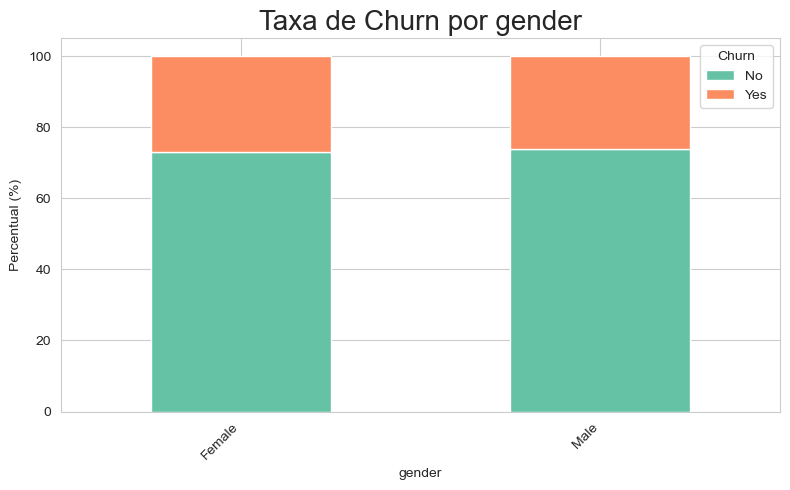

<Figure size 800x500 with 0 Axes>

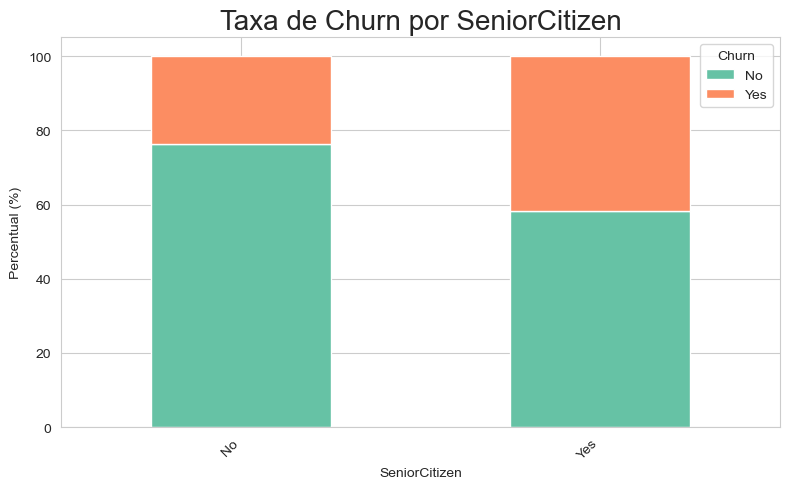

<Figure size 800x500 with 0 Axes>

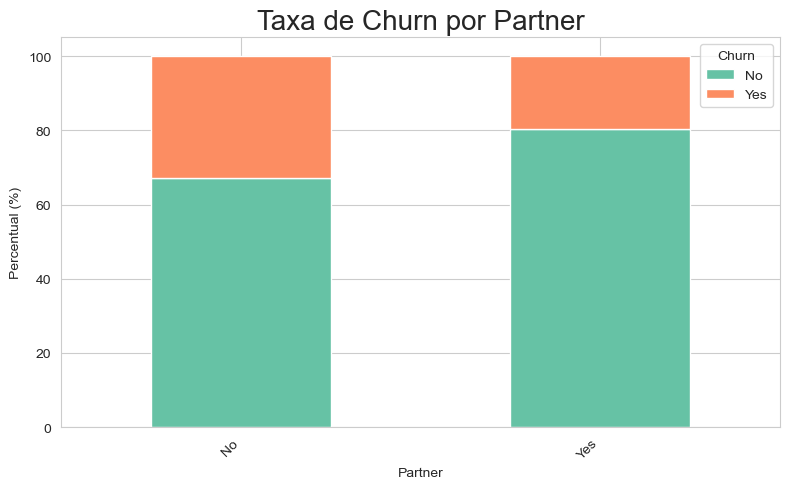

<Figure size 800x500 with 0 Axes>

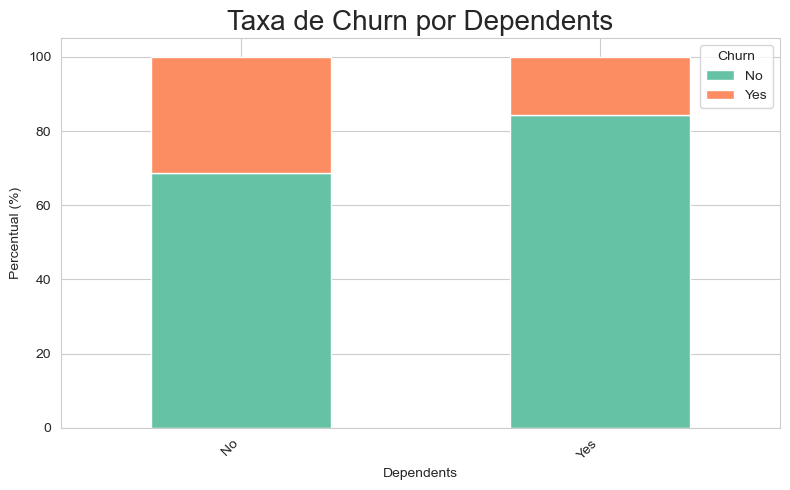

<Figure size 800x500 with 0 Axes>

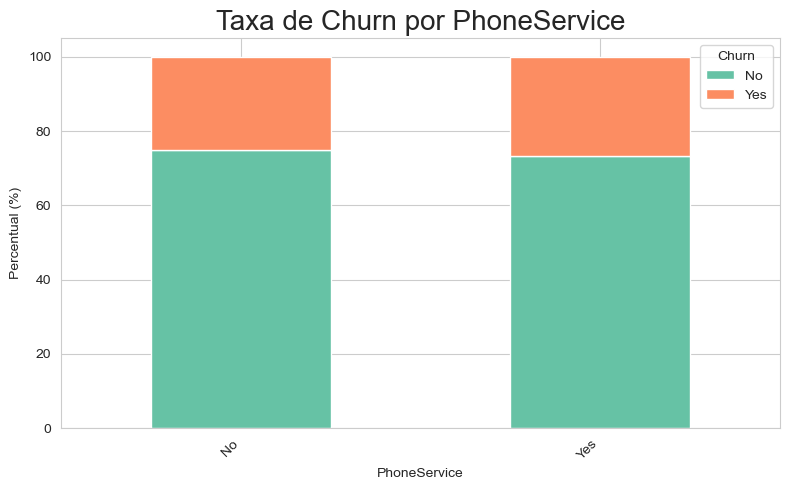

<Figure size 800x500 with 0 Axes>

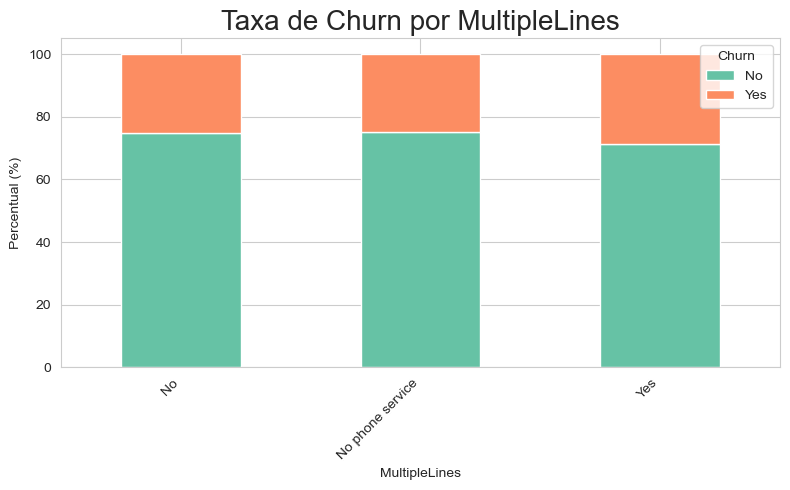

<Figure size 800x500 with 0 Axes>

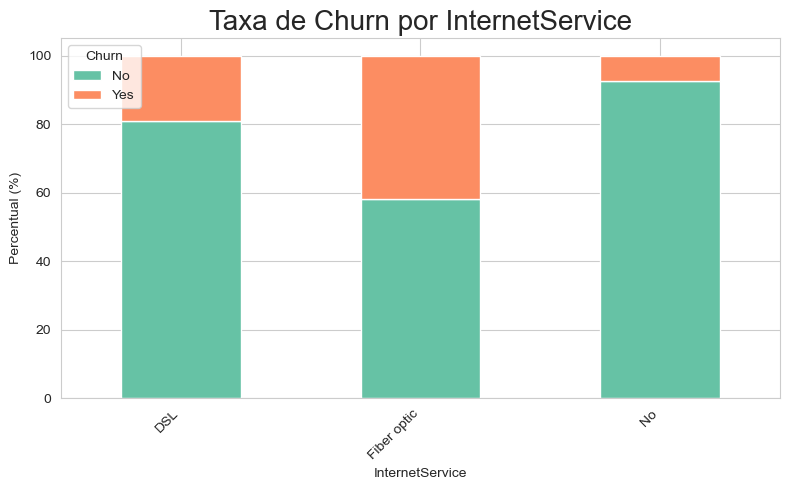

<Figure size 800x500 with 0 Axes>

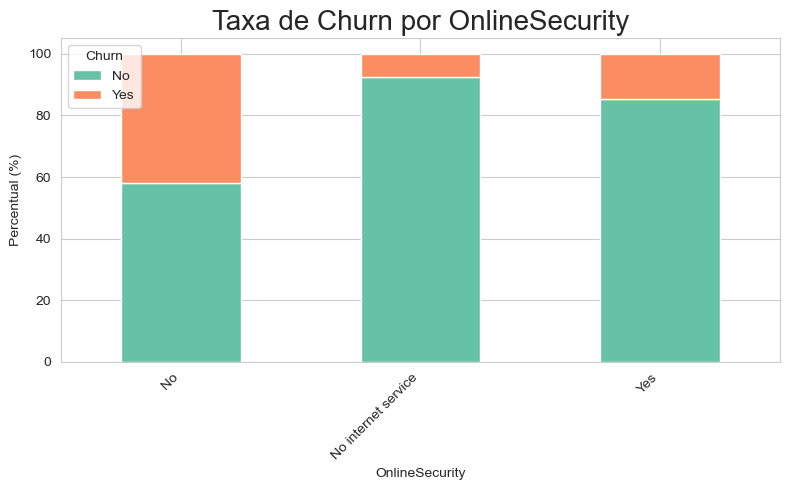

<Figure size 800x500 with 0 Axes>

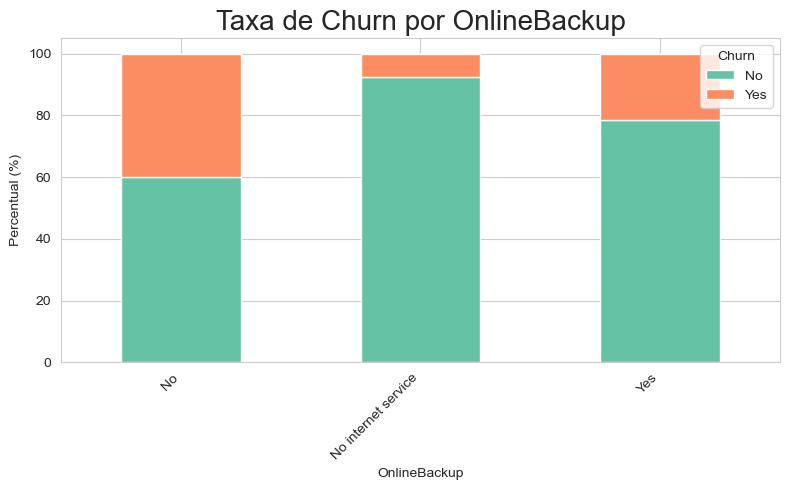

<Figure size 800x500 with 0 Axes>

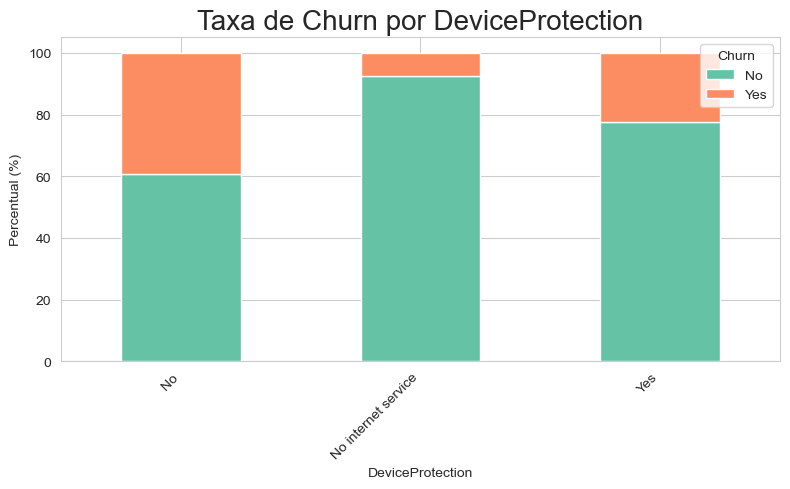

<Figure size 800x500 with 0 Axes>

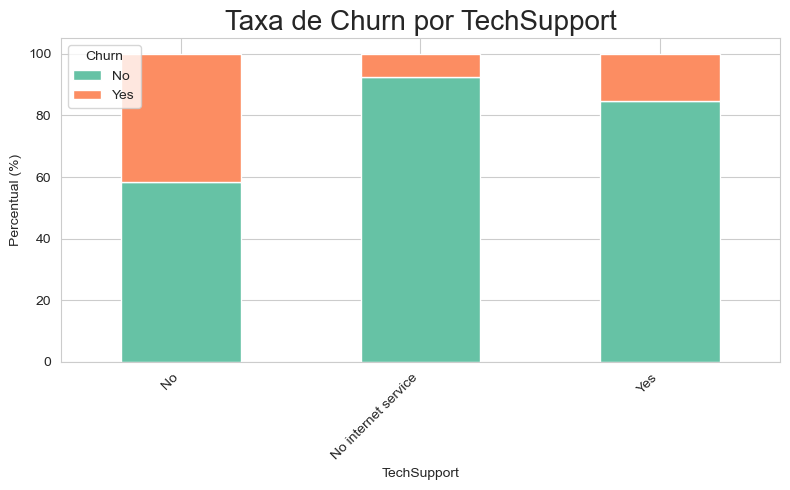

<Figure size 800x500 with 0 Axes>

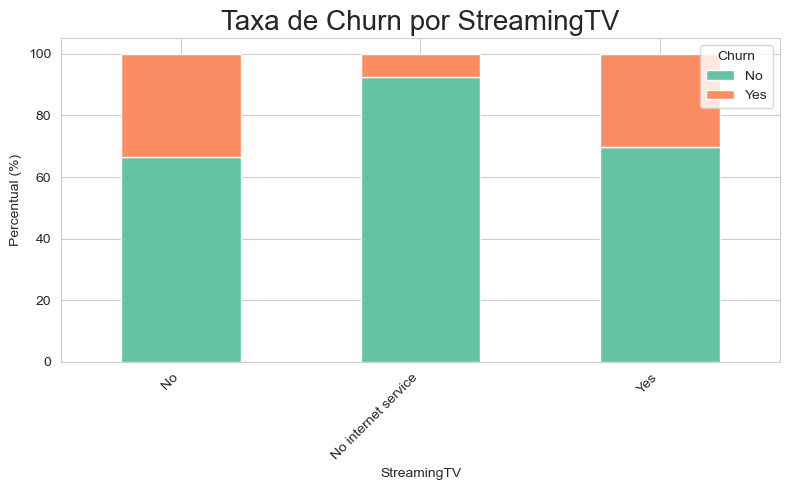

<Figure size 800x500 with 0 Axes>

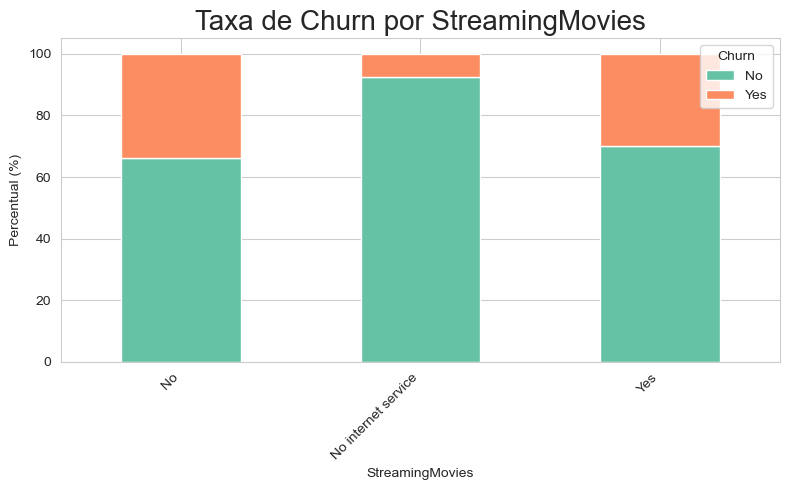

<Figure size 800x500 with 0 Axes>

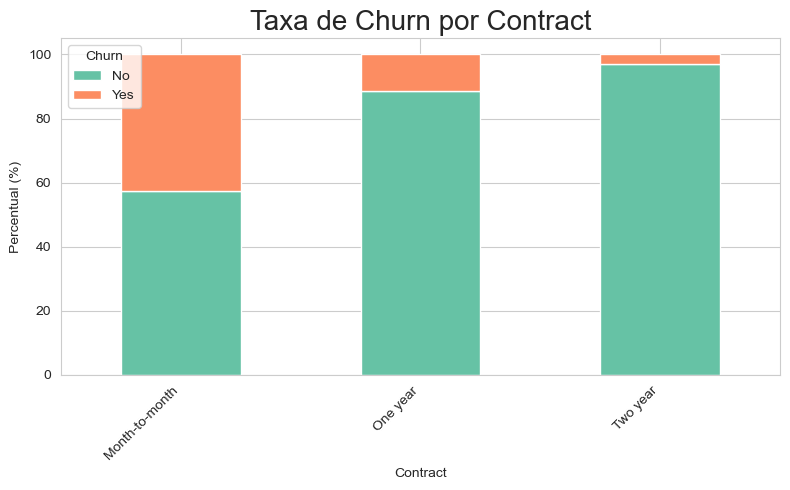

<Figure size 800x500 with 0 Axes>

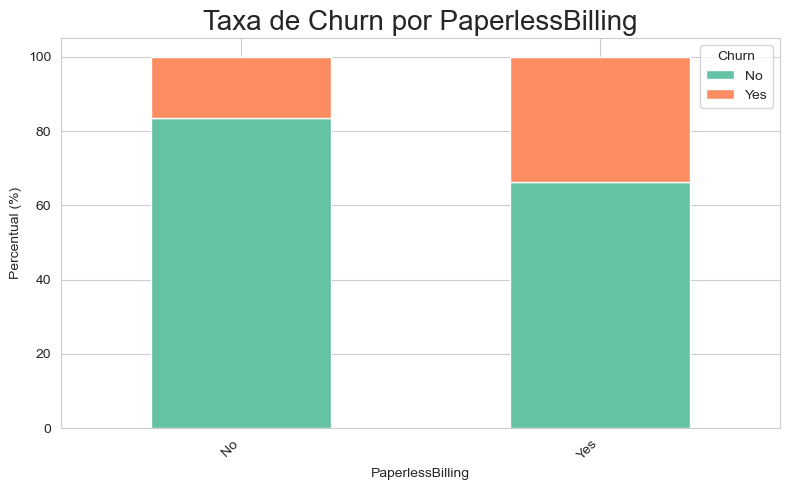

<Figure size 800x500 with 0 Axes>

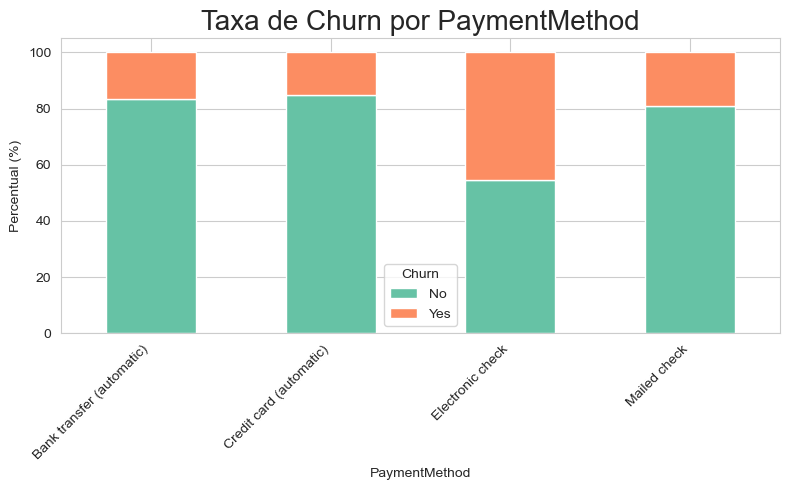

<Figure size 800x500 with 0 Axes>

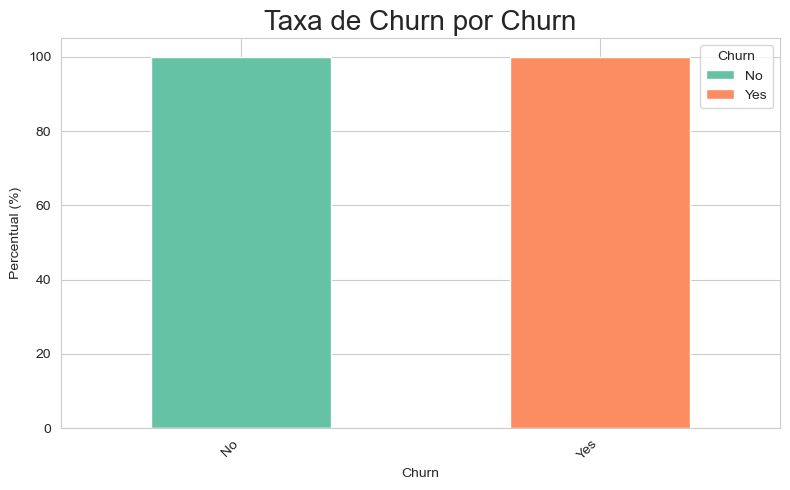

In [78]:

# Lista das colunas categóricas (exceto ID)
colunas_categoricas = dados.select_dtypes(include=['object', 'category']).columns.drop('customerID')

# Dicionário de insights categóricos por variável
insights = {
    'Contract': """
### Análise Bivariada: `Contract` vs `Churn`

- **Distribuição de Cancelamentos**:
  - Clientes com **contratos mensais (`Month-to-month`)** têm a maior taxa de churn.
  - Contratos anuais ou bienais apresentam **menor taxa de cancelamento**.

- **Insight**:
  - A **flexibilidade dos contratos mensais** facilita o churn.
  - Contratos mais longos geram **maior fidelização**, possivelmente por envolverem compromissos ou benefícios.

- **Próximos Passos**:
  - Focar em estratégias de **migração de clientes de contratos mensais para planos mais longos**.
  - Oferecer **benefícios exclusivos para contratos anuais ou de 2 anos**.
""",

    # Adicione aqui os demais insights (ex: 'InternetService', 'PaymentMethod', etc.)
}


# Loop para análise categórica
for coluna in colunas_categoricas:
    if coluna == 'customerID':
        continue

    plt.figure(figsize=(8, 5))

    # Calcula a taxa de churn por categoria mantendo índice hierárquico
    taxa_churn = (
        dados
        .groupby([coluna, 'Churn'])['Churn']
        .count()
        .unstack()
        .fillna(0)
    )

    # Normaliza para percentual
    taxa_churn_percentual = taxa_churn.div(taxa_churn.sum(axis=1), axis=0) * 100

    # Gráfico
    taxa_churn_percentual[['No', 'Yes']].plot(
        kind='bar',
        stacked=True,
        figsize=(8, 5),
        color=['#66c2a5', '#fc8d62']
    )

    plt.title(f'Taxa de Churn por {coluna}', fontsize=20)
    plt.xlabel(coluna)
    plt.ylabel('Percentual (%)')
    plt.xticks(rotation=45, ha='right')
    plt.legend(title='Churn')
    plt.tight_layout()
    plt.show()
    
    

    print("\n" + "=" * 80)
